## <center> DMBDA project: Unsupervised mining (Part 2)


**Group 6** : 
1. WINNIE KADZO YAA
2. GOD’SPOWER EMMANUEL OKON
3. SANDRA MARION KAM TSEMO
4. AMISI FIKIRINI
5. ELIE RENE MULAMBA
6. KALIDOU ALIOU BALL

### Objectifs
Ce travail consiste à 
*	Effectuer plusieurs ACP en considérant séparément les groupes d’indicateurs. On comparera ensuite les plans factoriels résultants à ceux obtenus sur l’intégralité des variables. 
*	Effectuer plusieurs classifications des individus par une méthode géométrique (e.g. classification hiérarchique, par partitionnement) en considérant séparément les groupes d’indicateurs. On comparera ensuite cette classification à celle obtenue sur l’intégralité des variables. 


## PCA pour la mfeat-zer: 47 Zernike moments 

In [ ]:
import pandas as pd
import numpy as np
data_mfeatZer=pd.read_fwf('mfeat-zer', sep='\s+', header=None,names=['x'+str(i) for i in range(47)])
data_mfeatZer.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,0.011033,0.831466,15.351804,75.806559,171.554214,490.156556,206.416027,0.122135,2.601646,11.472709,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,0.038271,1.166746,10.526913,42.369276,85.187116,420.360566,253.569574,0.033657,0.390566,11.700830,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,0.042698,1.225007,8.273804,31.744786,54.448177,404.103204,389.980746,0.041733,0.937399,11.629045,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,0.032418,1.638247,19.205283,51.196682,57.181760,429.052011,256.174645,0.073624,1.973268,13.057108,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,0.015866,0.611561,8.627839,37.325052,48.509025,459.909634,238.572767,0.046477,1.117292,10.012169,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [ ]:
data_mfeatZer.shape # Dimension(ligne,colonne)

(2000, 47)

### Statistques univariées

In [ ]:
data_mfeatZer.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,2000.0,0.078554,0.066552,0.001094,0.032160,0.057027,0.106162,0.496841
x1,2000.0,1.764332,1.159269,0.032385,0.928543,1.550141,2.360365,9.363772
x2,2000.0,21.708127,11.728827,0.364935,12.391974,20.868980,29.715504,72.443632
x3,2000.0,69.881897,38.348810,2.240865,40.587107,63.220758,94.255601,200.558005
x4,2000.0,109.519676,53.202068,3.822781,69.938353,106.643071,143.995104,284.648888
x5,2000.0,266.027267,124.192494,1.937737,166.395919,258.039088,360.421939,563.061573
x6,2000.0,147.578565,100.397369,0.045660,60.878624,132.145970,220.408564,463.128264
x7,2000.0,0.117313,0.086653,0.002745,0.053369,0.094367,0.162198,0.629253
x8,2000.0,2.602039,1.583353,0.073840,1.362552,2.361967,3.518741,8.689242
x9,2000.0,24.564107,17.233333,0.559946,11.906010,20.464571,32.672407,92.652118


On voit nous observations sont dispersées car les erreurs tres differents.

### Statistique bivariées (un plot entre deux variales)

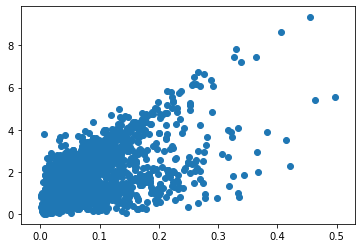

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_mfeatZer['x0'],data_mfeatZer['x1'])

### Standarisation de nos données

In [ ]:
mean_mfeatzer=data_mfeatZer.mean()
std_mfeatzer=data_mfeatZer.std()
data_mfeatZer_scaled=(data_mfeatZer-mean_mfeatzer)/std_mfeatzer
data_mfeatZer_scaled.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,-1.014568,-0.804702,-0.541940,0.154494,1.166017,1.804693,0.586046,0.055656,-0.000248,-0.759656,...,-0.843660,0.013034,-1.363688,-1.633185,-0.982319,-0.756905,0.074372,-0.911693,-0.678507,0.426795
1,-0.605294,-0.515486,-0.953310,-0.717431,-0.457361,1.242694,1.055715,-0.965414,-1.396703,-0.746418,...,-0.471524,0.088076,0.837274,-0.229636,-0.797572,-0.221317,-0.157228,-0.000702,-0.740493,0.135111
2,-0.538764,-0.465228,-1.145411,-0.994480,-1.035138,1.111790,2.414428,-0.872206,-1.051339,-0.750584,...,-0.944367,-0.663353,-0.631469,0.085372,-0.929826,0.211912,-0.689569,-0.678279,-0.898144,0.577542
3,-0.693233,-0.108762,-0.213392,-0.487244,-0.983757,1.312678,1.081663,-0.504180,-0.397113,-0.667718,...,-0.998137,-0.913355,-0.614443,-0.116992,-0.303761,0.438058,-0.811221,-1.155877,-0.257834,0.929265
4,-0.941937,-0.994395,-1.115226,-0.848966,-1.146772,1.561144,0.906341,-0.817467,-0.937723,-0.844406,...,-1.287483,-1.171681,-0.626081,0.393383,-0.483799,-0.692122,-1.091386,-0.774946,-0.376883,-0.234833


Aprés avoir standardisé les données on calcule la matrice de corrélation qui nous permettra de déterminer les valeurs propres et vecteurs propres qui vont reduire de maniére fidéle la dimension du dataset de départ tout en faisant apparaître le nuages de point des individus par rapport aux varaibles.

## 1. PCA normée sur data_mfeatZer

### Calcule de la matrice de data_mfeatZer_scaled

In [ ]:
cormat1=data_mfeatZer_scaled.corr()
cormat1

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
x0,1.000000,0.582228,0.586857,0.426893,0.172336,-0.359551,0.184742,0.654838,0.445003,0.468497,...,0.295549,0.137571,0.078531,0.292815,0.337360,-0.340369,0.152759,0.066604,0.368042,-0.359140
x1,0.582228,1.000000,0.626514,0.333225,0.204875,-0.242210,0.130647,0.315138,0.202820,0.092235,...,0.030230,0.097407,0.044254,0.528529,0.195282,-0.214191,0.040686,0.031444,0.222016,-0.295527
x2,0.586857,0.626514,1.000000,0.707603,0.296111,-0.142328,0.228529,0.458392,0.216117,0.067381,...,0.069452,0.128559,0.039284,0.253483,0.368168,-0.353573,0.157302,0.088614,0.414286,-0.288032
x3,0.426893,0.333225,0.707603,1.000000,0.395266,-0.100937,0.162384,0.363167,0.074018,-0.030265,...,0.008616,0.066506,0.010172,0.174278,0.073658,-0.181376,0.066036,0.018987,0.106908,-0.162510
x4,0.172336,0.204875,0.296111,0.395266,1.000000,-0.034110,0.144303,0.123658,0.077429,0.025639,...,-0.084184,0.037551,-0.010996,0.279807,0.027980,-0.126193,-0.093250,0.005210,0.048947,-0.163263
x5,-0.359551,-0.242210,-0.142328,-0.100937,-0.034110,1.000000,0.006064,-0.353543,-0.337323,-0.452482,...,-0.490485,-0.253060,-0.140891,-0.297107,-0.120273,-0.060290,-0.320180,-0.133542,-0.029312,0.313077
x6,0.184742,0.130647,0.228529,0.162384,0.144303,0.006064,1.000000,0.102801,0.057305,0.073809,...,-0.127320,-0.126961,-0.042106,0.138892,0.345908,-0.345537,-0.216011,-0.031968,0.360240,-0.236351
x7,0.654838,0.315138,0.458392,0.363167,0.123658,-0.353543,0.102801,1.000000,0.594372,0.469504,...,0.473100,0.276665,0.054671,0.153230,0.221699,-0.271314,0.333807,0.077602,0.240466,-0.312004
x8,0.445003,0.202820,0.216117,0.074018,0.077429,-0.337323,0.057305,0.594372,1.000000,0.542242,...,0.400204,0.234645,0.058469,0.200078,0.145676,-0.207048,0.259307,0.089215,0.152147,-0.303578
x9,0.468497,0.092235,0.067381,-0.030265,0.025639,-0.452482,0.073809,0.469504,0.542242,1.000000,...,0.592539,0.106932,0.098011,-0.031135,0.159070,-0.287466,0.054141,0.066185,0.149732,-0.397480


### Calcul de valeurs propres de la Matrice de Correlation et leurs vecteurs propres associés de 

In [ ]:
from numpy import linalg as LA 
egvalues1,egvectors1 = LA.eig(cormat1)
print('eigenvalues\n\n',egvalues1)
print('-'*90)
print('eigenvectors\n\n',egvectors1) ## calcule des valeurs propres et vecteurs propres

eigenvalues

 [1.13888864e+01 6.96363701e+00 4.32485449e+00 3.80927422e+00
 2.70450607e+00 2.15428721e+00 1.69064772e+00 1.49609915e+00
 1.28866322e+00 1.19421835e+00 1.11583230e+00 9.98834263e-01
 9.14939814e-01 8.66897062e-01 7.96362375e-01 6.66250281e-01
 5.85635322e-01 5.60131750e-01 5.15660113e-01 4.53888141e-01
 4.31640964e-01 3.62562843e-01 3.43515519e-01 2.71283746e-01
 2.24606383e-01 1.96241280e-01 1.56235441e-01 9.53511444e-02
 8.68460617e-02 7.11378905e-02 6.10944126e-02 5.11740101e-02
 4.20100292e-02 3.57254931e-02 2.88114838e-02 2.16311293e-02
 9.01919147e-03 7.14572155e-03 4.58280879e-03 3.49158782e-03
 3.00581260e-03 2.43648848e-03 7.46250517e-04 1.29436951e-04
 4.73710604e-05 6.02984571e-06 1.61808438e-05]
------------------------------------------------------------------------------------------
eigenvectors

 [[ 2.37917250e-01  2.65058206e-02  4.99865804e-04 ...  1.47441311e-03
   1.07254445e-03  9.22128507e-05]
 [ 1.80097151e-01  1.16572957e-01 -1.05677693e-01 ...  6.

### Le pourcentage de chaque valeur propre

In [ ]:
pdv1=pd.DataFrame({'axe': np.arange(47)+1,'eigenvalues':list(egvalues1)})

In [ ]:
pdv1['proportion']=pdv1['eigenvalues']/pdv1['eigenvalues'].sum()*100
pdv1['cumul']=pdv1['proportion'].cumsum()
pdv1

,axe,eigenvalues,proportion,cumul
0,1,11.388886,24.231673,24.231673
1,2,6.963637,14.816249,39.047922
2,3,4.324854,9.201818,48.249740
3,4,3.809274,8.104839,56.354579
4,5,2.704506,5.754268,62.108847
5,6,2.154287,4.583590,66.692437
6,7,1.690648,3.597123,70.289560
7,8,1.496099,3.183190,73.472750
8,9,1.288663,2.741837,76.214586
9,10,1.194218,2.540890,78.755476


### Regle de Kaiser

In [ ]:
# Cette fonction permet de determiner les valeurs propres superieures à 1 et 
# leurs vecteurs propres correspondant
def eigenvalues_de_Kaiser(egvalues,egvectors):
    liste=[]
    liste1=[]
    for i in range(len(egvalues)):
        if egvalues[i]>1:
            liste.append(egvalues[i])
            liste1.append(egvectors[i])
    return liste,liste1
egvalues1,egvectors1=eigenvalues_de_Kaiser(egvalues1,egvectors1)
print(egvalues1)

[11.388886429990714, 6.963637011194213, 4.3248544923517525, 3.8092742183485364, 2.7045060707516178, 2.154287210180361, 1.6906477223056644, 1.4960991453451622, 1.2886632155389368, 1.1942183484006255, 1.1158323039416889]


In [ ]:
## D'apres la regle de Kaiser, On retient les onze premieres valeurs propres strictement superieure à 1.
print('on retient 11 valeurs propres:', len(egvalues1))

on retient 11 valeurs propres: 11


### Regle de Coudes

Text(0, 0.5, 'eigenvalues')

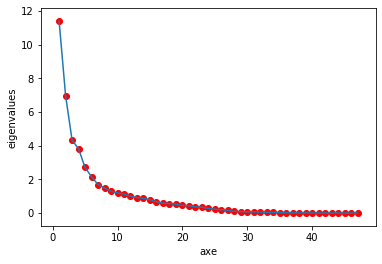

In [ ]:
# Aprés avoir appliqué la regle du kaiser on se retrouve avec 11 valeurs propres superieures à 1 
# Maintenant on applique la régle du coude pour retenir les plus grandes valeurs propres et les vecteurs propres
# correspondant aux plus grandes valeurs propres. Ces vecteurs propres vont constituer les facteurs.
import matplotlib.pyplot as plt 
plt.plot(pdv1['axe'],pdv1['eigenvalues'])
plt.scatter(pdv1['axe'],pdv1['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')

D'aprés la régle du coude on obtient la plus grande pente quand la valeur propre est egale à 4.324854 qui la troisiéme valeur propre la plus grande. Ceci veut dire que les trois vecteurs propres correspondant seront nos trois vecteurs unitaires donc nous aurons trois axes factoriels.

### Regle de Kaiseur

### Nota:
En combinant la regle de Kaiseur et celle de coudes on retient seulement 3 axes.

In [ ]:
egvalues1,egvectors1=eigenvalues_de_Kaiser(egvalues1,egvectors1)
v_1,v_2,v_3=egvalues1[0:3] # v_1,v_2,v_3 représentent les trois valeurs propres les plus grandes 
u_1,u_2,u_3=egvectors1[0:3] # u_1,u_2,u_3 représentent les trois vecteurs propres correspondant à ces valeurs

### Calcul les composantes principales:
qui sont les variables artificielles des individus initiaux

In [ ]:
# Ici on calcule les composantes principales qui sont les variables artificielles des individus initiaux 
c_1=np.matmul(data_mfeatZer_scaled.values,u_1)
c_2=np.matmul(data_mfeatZer_scaled.values,u_2)
c_3=np.matmul(data_mfeatZer_scaled.values,u_3)

In [ ]:
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
pdseries3=pd.Series(c_3)
data_mfeatZer_pca=pd.DataFrame([pdseries1,pdseries2,pdseries3])
data_mfeatZer_pca=data_mfeatZer_pca.T
data_mfeatZer_pca.columns=['F1','F2','F3']
data_mfeatZer_pca

,F1,F2,F3
0,-1.669172,0.340161,-0.825056
1,0.444512,0.286802,-0.498604
2,0.105425,-0.440275,0.362540
3,-0.572805,0.006595,0.430104
4,-0.492676,0.625851,0.293728
...,...,...,...
1995,0.315673,0.791074,0.073484
1996,0.227464,1.343107,0.399750
1997,0.174213,1.141328,0.183410
1998,1.293368,-0.289092,-0.237017


# Representation graphique des nos individus suivant F1 et F2

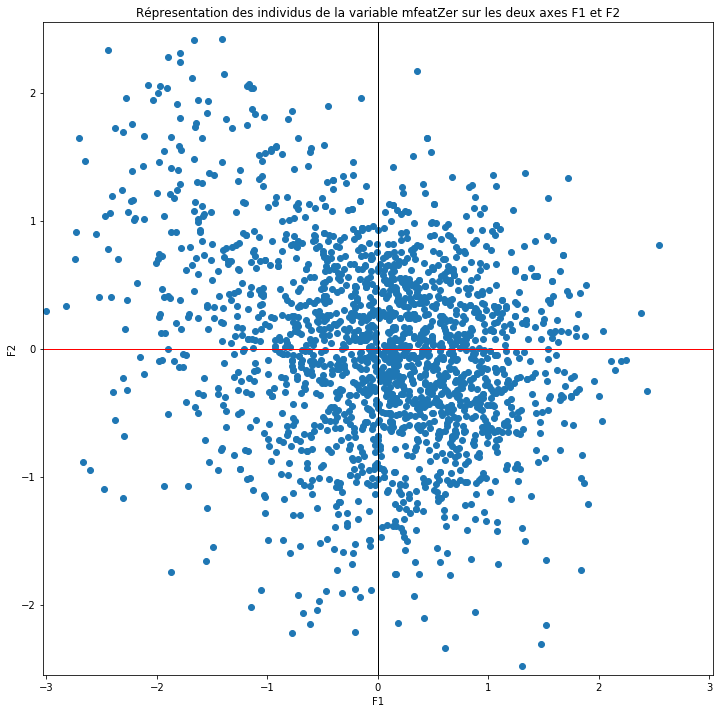

In [ ]:
#positionnement des individus dans le premier plan F1xF2 
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeatZer_pca['F1'].max(),data_mfeatZer_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatZer_pca['F2'].max(),data_mfeatZer_pca['F2'].max()) #et en ordonnée

# for i, (x,y) in enumerate (zip(data_mfeatZer_pca['F1'],data_mfeatZer_pca['F2'])):
#     plt.text(x,y,data_mfeatZer.index[i])

plt.scatter(x=data_mfeatZer_pca['F2'],y=data_mfeatZer_pca['F1']) 
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Répresentation des individus de la variable mfeatZer sur les deux axes F1 et F2')
 #ajouter les axes  
plt.plot([-data_mfeatZer_pca['F1'].max(),data_mfeatZer_pca['F1'].max()],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-data_mfeatZer_pca['F2'].max(),data_mfeatZer_pca['F2'].max()],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

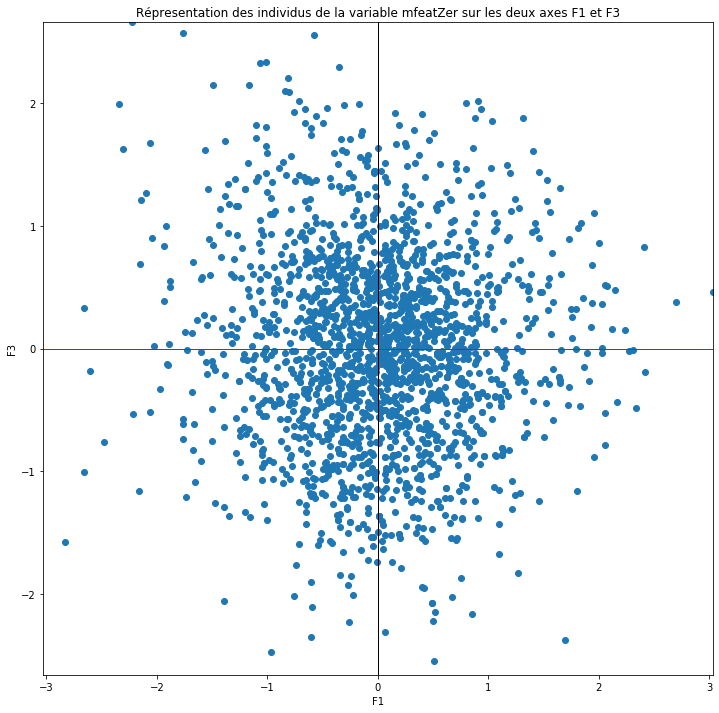

In [ ]:
#positionnement des individus dans le premier plan F1xF2 
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeatZer_pca['F1'].max(),data_mfeatZer_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatZer_pca['F3'].max(),data_mfeatZer_pca['F3'].max()) #et en ordonnée

# for i, (x,y) in enumerate (zip(data_mfeatZer_pca['F1'],data_mfeatZer_pca['F3'])):
#     plt.text(x,y,data_mfeatZer.index[i])

plt.scatter(x=data_mfeatZer_pca['F1'],y=data_mfeatZer_pca['F3']) 
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('Répresentation des individus de la variable mfeatZer sur les deux axes F1 et F3')
 #ajouter les axes  
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

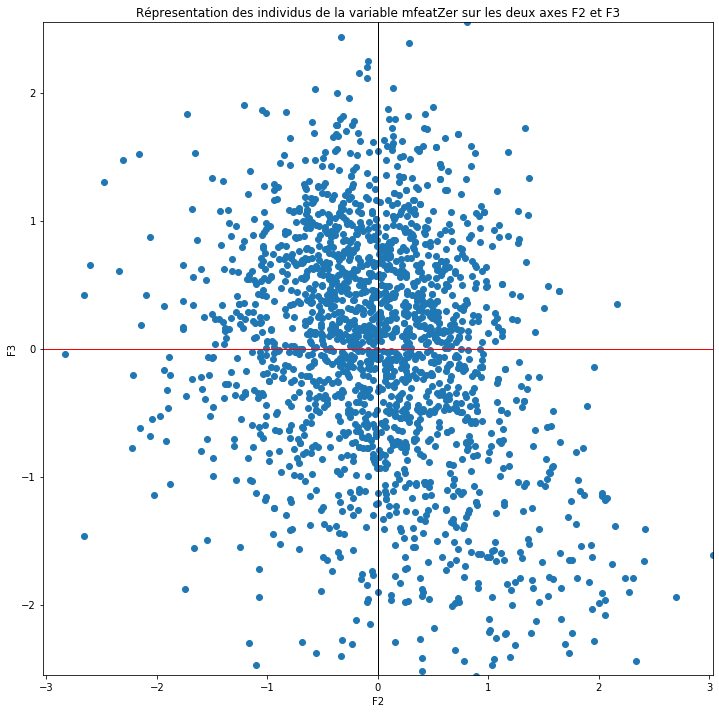

In [ ]:
#positionnement des individus dans le premier plan F1xF2 
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeatZer_pca['F1'].max(),data_mfeatZer_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatZer_pca['F2'].max(),data_mfeatZer_pca['F2'].max()) #et en ordonnée

# for i, (x,y) in enumerate (zip(data_mfeatZer_pca['F2'],data_mfeatZer_pca['F3'])):
#     plt.text(x,y,data_mfeatZer.index[i])

plt.scatter(x=data_mfeatZer_pca['F1'],y=data_mfeatZer_pca['F2']) 
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('Répresentation des individus de la variable mfeatZer sur les deux axes F2 et F3')
 #ajouter les axes  
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

### CLUSTERING Sur data_mfeatZer

In [ ]:
from sklearn.cluster import KMeans # importation de la methode cluster de la classe KMEANS du module Sklearn
kmeans=KMeans() # Creation de kmeans objet de la classe KMEANS avec nombre de classes n_clusters=10
kmeans.fit(data_mfeatZer_pca) # Entrainement de notre modele kmeans via la fonction fit sur le nouveau jeu de donnée issu de PCA
y_kmeans=kmeans.predict(data_mfeatZer_pca) # Prediction de nos observations
data_mfeatZer_pca['classe']=y_kmeans # Creation d'une colonne 'classe' dans data_mfeatZer_pca contenant de valeurs de predictions
data_mfeatZer_pca

,F1,F2,F3,classe
0,-1.669172,0.340161,-0.825056,3
1,0.444512,0.286802,-0.498604,6
2,0.105425,-0.440275,0.362540,0
3,-0.572805,0.006595,0.430104,1
4,-0.492676,0.625851,0.293728,4
...,...,...,...,...
1995,0.315673,0.791074,0.073484,4
1996,0.227464,1.343107,0.399750,4
1997,0.174213,1.141328,0.183410,4
1998,1.293368,-0.289092,-0.237017,0


### On affiche nos individus suivant toutes les variables (F1,F2,F3)

In [ ]:
import seaborn as sns

In [ ]:
#sns.swarmplot(x=data_mfeatZer_pca[],y=data_mfeatZer_pca[])

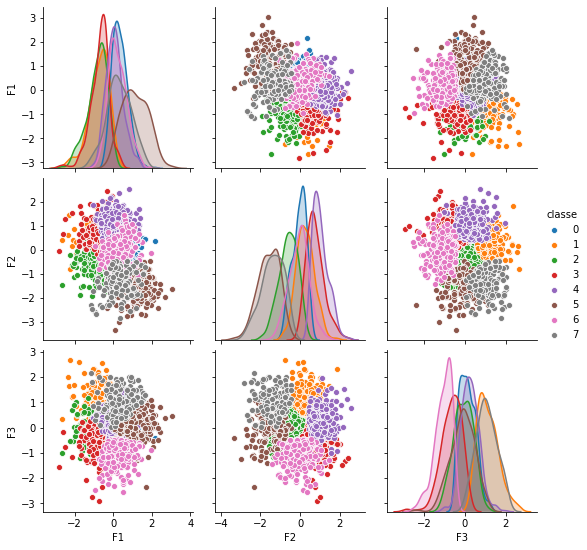

In [ ]:
sns.pairplot(data=data_mfeatZer_pca, hue='classe')

### Interprétation de clusters

In [ ]:
data_mfeatZer_pca['classe'].value_counts()

0    435
4    341
6    294
3    243
2    207
1    187
5    162
7    131
Name: classe, dtype: int64

# 2. PCA pour data_mfeatFac

In [ ]:
data_mfeatFac=pd.read_fwf('mfeat-fac', sep='\s+', header=None,names=['fac'+str(i) for i in range(216)])
data_mfeatFac

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,912,507,577,757,15,24,11,14,10,18
1996,324,330,919,713,609,693,28,16,8,9,...,898,554,620,632,12,25,11,10,12,17
1997,337,299,852,724,581,660,22,14,10,10,...,841,579,590,681,18,27,13,15,17,21
1998,247,261,866,633,565,615,24,15,2,4,...,839,498,556,706,16,26,13,13,15,15


In [ ]:
data_mfeatFac.describe().T

,count,mean,std,min,25%,50%,75%,max
fac0,2000.0,272.0515,91.275454,67.0,208.0,274.5,338.0,515.0
fac1,2000.0,322.7255,109.426588,81.0,247.0,324.0,406.0,565.0
fac2,2000.0,710.8245,207.932666,0.0,631.0,735.0,849.0,998.0
fac3,2000.0,737.8390,137.219910,0.0,662.0,733.0,824.0,998.0
fac4,2000.0,640.4605,48.940117,437.0,607.0,636.5,667.0,823.0
...,...,...,...,...,...,...,...,...
fac211,2000.0,21.5840,7.982343,1.0,16.0,23.0,27.0,38.0
fac212,2000.0,17.6120,5.884451,1.0,13.0,18.0,21.0,36.0
fac213,2000.0,11.9680,2.579788,4.0,10.0,12.0,14.0,18.0
fac214,2000.0,13.7045,1.985485,5.0,12.0,14.0,15.0,19.0


In [ ]:
mean_mfeatfac=data_mfeatFac.mean()
std_mfeatfac=data_mfeatFac.std()
data_mfeatFac_scaled=(data_mfeatFac-mean_mfeatfac)/std_mfeatfac
data_mfeatFac_scaled

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
0,-1.906882,-0.792545,-0.864821,-0.472519,-0.683703,-0.409280,-1.537234,-1.274927,-1.390649,-0.747721,...,-1.295928,-0.878797,-0.233531,-0.628922,0.044690,1.805986,-1.633457,1.175291,-0.858480,-0.097581
1,-1.654897,-1.185503,-0.499318,-0.924348,-1.133232,-0.204481,-1.096765,-1.274927,-1.503170,-1.237387,...,-1.030655,-1.530432,-1.258526,-0.605577,-0.528254,1.304880,-1.123639,0.400033,0.652485,-0.528877
2,-1.720632,-1.660707,-0.581075,-0.968074,-1.705360,-0.636835,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.944152,-1.196260,-1.223181,-0.348784,0.426652,1.680709,-0.273942,0.787662,-0.354825,-1.607117
3,-1.994529,-1.834339,-0.403133,-0.334055,-0.683703,-0.466169,-1.713421,-1.682990,-1.278128,-0.992554,...,-0.707713,-0.770191,-0.233531,-0.757318,-0.337273,1.680709,-1.803397,0.012404,0.652485,-0.960173
4,-1.260487,-1.423105,-0.143433,-0.523532,-1.092366,-0.193103,-1.008672,-1.682990,-1.615692,-1.237387,...,-0.603910,-0.970694,-1.293870,-0.383801,-0.337273,1.680709,-1.293579,1.175291,-0.354825,-0.097581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350023,-0.737714,1.039642,-0.815035,-1.562328,-0.102081,0.488920,-0.186757,-1.728213,-0.502888,...,1.229939,-1.121071,-1.134819,0.830131,-0.528254,0.302668,-1.123639,0.787662,-1.865791,0.980659
1996,0.569140,0.066478,1.001168,-0.181016,-0.642837,0.114096,0.753200,-0.322778,-0.828043,-0.013221,...,1.149203,-0.728419,-0.374910,-0.628922,-1.101197,0.427945,-1.123639,-0.762854,-0.858480,0.765011
1997,0.711566,-0.216817,0.678948,-0.100853,-1.214964,-0.261369,0.224639,-0.594821,-0.603001,0.231612,...,0.820494,-0.519562,-0.905079,-0.056973,0.044690,0.678498,-0.783760,1.175291,1.659796,1.627603
1998,-0.274460,-0.564081,0.746278,-0.764022,-1.541895,-0.773367,0.400826,-0.458799,-1.503170,-1.237387,...,0.808961,-1.196260,-1.505938,0.234837,-0.337273,0.553221,-0.783760,0.400033,0.652485,0.333715


In [ ]:
cormat2=data_mfeatFac_scaled.corr()
cormat2

,fac0,fac1,fac2,fac3,fac4,fac5,fac6,fac7,fac8,fac9,...,fac206,fac207,fac208,fac209,fac210,fac211,fac212,fac213,fac214,fac215
fac0,1.000000,0.503564,0.044639,0.281942,0.340413,0.124469,0.495113,0.322912,0.454491,0.368102,...,0.278506,0.479824,0.304511,0.064378,0.315506,-0.282642,0.253524,-0.089084,-0.199979,0.103426
fac1,0.503564,1.000000,0.147405,0.216432,0.274847,0.288049,0.780144,0.646216,0.535089,0.472714,...,0.357997,0.292552,0.168476,0.224692,0.341142,-0.731675,0.367725,-0.376068,-0.302331,0.065216
fac2,0.044639,0.147405,1.000000,0.055830,0.030394,-0.159355,0.181381,0.175989,0.081639,0.116051,...,0.539946,0.083889,-0.047854,-0.164081,0.049244,-0.238297,0.101528,-0.080881,-0.069092,0.000452
fac3,0.281942,0.216432,0.055830,1.000000,0.175043,0.027913,0.031291,0.184469,0.453688,0.057276,...,0.049961,0.502368,0.228312,-0.076025,-0.016388,-0.150457,0.264449,-0.038191,-0.096970,0.027243
fac4,0.340413,0.274847,0.030394,0.175043,1.000000,0.039995,0.118425,0.179999,0.463299,0.213168,...,0.055114,0.435907,0.761068,-0.039632,0.192233,-0.154928,0.319391,-0.185244,-0.187955,-0.158022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fac211,-0.282642,-0.731675,-0.238297,-0.150457,-0.154928,-0.068401,-0.578317,-0.868616,-0.413420,-0.383975,...,-0.353192,-0.197030,-0.017729,-0.047287,-0.245379,1.000000,-0.306559,0.418448,0.170039,0.070836
fac212,0.253524,0.367725,0.101528,0.264449,0.319391,0.116687,0.146659,0.304714,0.569354,0.017336,...,0.086511,0.426755,0.361891,0.228091,-0.071560,-0.306559,1.000000,-0.131873,-0.230111,-0.011162
fac213,-0.089084,-0.376068,-0.080881,-0.038191,-0.185244,-0.046322,-0.347868,-0.255007,-0.245597,-0.397400,...,-0.178799,-0.101118,-0.094534,-0.081025,-0.237976,0.418448,-0.131873,1.000000,0.134200,0.028434
fac214,-0.199979,-0.302331,-0.069092,-0.096970,-0.187955,-0.218200,-0.314600,-0.156124,-0.250242,-0.014132,...,-0.183999,-0.074223,-0.186565,-0.181814,0.046035,0.170039,-0.230111,0.134200,1.000000,-0.081422


In [ ]:
# sns.heatmap(cormat2)

### Calcul de valeurs propres de la matrice de corrélation

In [ ]:
egvalues2,egvectors2 = LA.eig(cormat2)
print('eigenvalues\n\n',egvalues2)
print('-'*90)
print('eigenvectors\n\n',egvectors2)

eigenvalues

 [ 4.35220959e+01  2.85707050e+01  2.21570102e+01  1.50796733e+01
  1.21287289e+01  9.82592433e+00  7.69444423e+00  6.71993572e+00
  5.54739201e+00  5.07479146e+00  4.14576476e+00  3.66488612e+00
  3.28757219e+00  2.81967219e+00  2.58599137e+00  2.44390102e+00
  2.30723940e+00  1.93344351e+00  1.86423078e+00  1.57352072e+00
  1.54491945e+00  1.48441550e+00  1.33529931e+00  1.23747743e+00
  1.20597242e+00  1.07324370e+00  1.00802219e+00  9.24648798e-01
  8.90815264e-01  8.43260998e-01  8.35837703e-01  8.09223389e-01
  7.84938965e-01  7.57240363e-01  7.28660297e-01  7.00857890e-01
  6.58104124e-01  6.38366116e-01  5.53415221e-01  5.19197060e-01
  5.13485318e-01  4.99343007e-01  4.60948189e-01  4.27407774e-01
  4.12658255e-01  3.96375693e-01  3.84845718e-01  3.75565317e-01
  3.60434969e-01  3.50283863e-01  3.48937972e-01  3.25107634e-01
  3.10395565e-01  2.98481301e-01  2.92527053e-01  2.77040973e-01
  2.67877470e-01  2.62833492e-01  2.52812618e-01  2.43176824e-01
  2.4109322

In [ ]:
pdv2=pd.DataFrame({'axe': np.arange(216)+1,'eigenvalues':list(egvalues2)})

In [ ]:
pdv2['proportion']=pdv2['eigenvalues']/pdv2['eigenvalues'].sum()*100
pdv2['cumul']=pdv2['proportion'].cumsum()
pdv2

,axe,eigenvalues,proportion,cumul
0,1,43.522096,20.149118,20.149118
1,2,28.570705,13.227178,33.376297
2,3,22.157010,10.257875,43.634172
3,4,15.079673,6.981330,50.615502
4,5,12.128729,5.615152,56.230654
...,...,...,...,...
211,212,0.003848,0.001782,99.991577
212,213,0.003887,0.001799,99.993376
213,214,0.004179,0.001935,99.995311
214,215,0.005177,0.002397,99.997708


In [ ]:
def eigenvalues_de_Kaiser(egvalues,egvectors):
    liste=[]
    liste1=[]
    for i in range(len(egvalues)):
        if egvalues[i]>1:
            liste.append(egvalues[i])
            liste1.append(egvectors[i])
    return liste,liste1
egvalues2,egvectors2=eigenvalues_de_Kaiser(egvalues2,egvectors2)

In [ ]:
print('on retient valeurs propres:', len(egvalues2))

on retient valeurs propres: 27


Text(0, 0.5, 'eigenvalues')

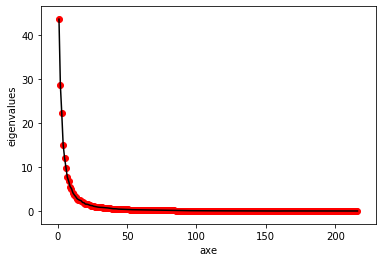

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(pdv2['axe'],pdv2['eigenvalues'],c='black')
plt.scatter(pdv2['axe'],pdv2['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')
# plt.bar(pdv2['axe'],pdv2['eigenvalues'])

In [ ]:
v_1,v_2,v_3=egvalues2[0:3]
u_1,u_2,u_3=egvectors2[0:3]
c_1=np.matmul(data_mfeatFac_scaled.values,u_1) # la premiere composante
c_2=np.matmul(data_mfeatFac_scaled.values,u_2)   # la deuxieme composante
c_3=np.matmul(data_mfeatFac_scaled.values,u_3) # la troisieme composante
c_1=c_1.astype(float)
c_2=c_2.astype(float)
c_3=c_3.astype(float)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# nouveau dataframe from pca
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
pdseries3=pd.Series(c_3)
data_mfeatFac_pca=pd.DataFrame([pdseries1,pdseries2,pdseries3])
data_mfeatFac_pca=data_mfeatFac_pca.T
data_mfeatFac_pca.columns=['F1','F2','F3']
data_mfeatFac_pca

,F1,F2,F3
0,-0.741091,-1.857023,-1.002633
1,-0.523098,-1.524125,-1.837957
2,-1.520615,-1.599413,-1.268983
3,-0.946496,-2.862899,-1.301784
4,-0.963217,-1.655866,-1.744019
...,...,...,...
1995,0.113571,-2.089162,-0.333673
1996,1.658641,-1.084493,0.204162
1997,1.296524,-1.880585,-0.568833
1998,0.987840,-2.096553,-0.876069


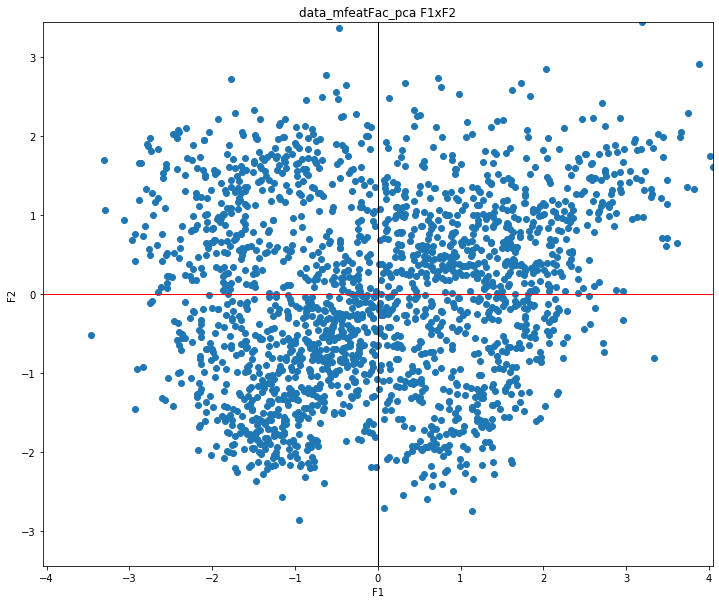

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_mfeatFac_pca['F1'].max(),data_mfeatFac_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatFac_pca['F2'].max(),data_mfeatFac_pca['F2'].max()) #et en ordonnée


plt.scatter(x=data_mfeatFac_pca['F1'],y=data_mfeatFac_pca['F2']) 
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('data_mfeatFac_pca F1xF2')
 #ajouter les axes  
plt.plot([-data_mfeatFac_pca['F1'].max(),data_mfeatFac_pca['F1'].max()],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-data_mfeatFac_pca['F1'].max(),data_mfeatFac_pca['F1'].max()],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

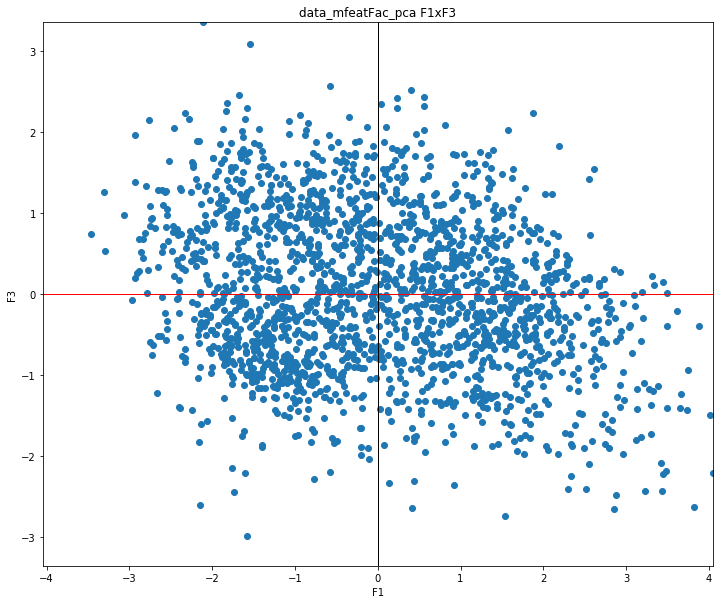

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_mfeatFac_pca['F1'].max(),data_mfeatFac_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatFac_pca['F3'].max(),data_mfeatFac_pca['F3'].max()) #et en ordonnée

#placement des étiquettes des observations
plt.scatter(x=data_mfeatFac_pca['F1'],y=data_mfeatFac_pca['F3']) 
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('data_mfeatFac_pca F1xF3')
 #ajouter les axes  
plt.plot([-data_mfeatFac_pca['F1'].max(),data_mfeatFac_pca['F1'].max()],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-data_mfeatFac_pca['F3'].max(),data_mfeatFac_pca['F3'].max()],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

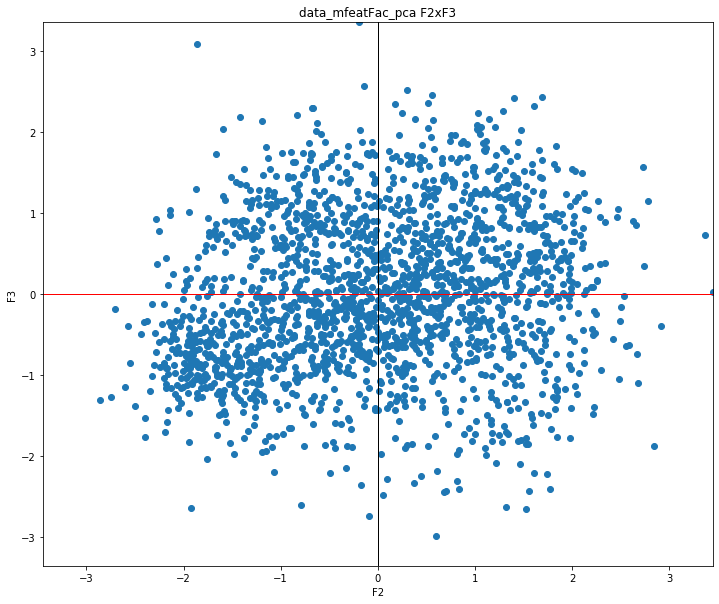

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_mfeatFac_pca['F2'].max(),data_mfeatFac_pca['F2'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatFac_pca['F3'].max(),data_mfeatFac_pca['F3'].max()) #et en ordonnée

plt.scatter(x=data_mfeatFac_pca['F2'],y=data_mfeatFac_pca['F3']) 
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('data_mfeatFac_pca F2xF3')
 #ajouter les axes  
plt.plot([-1500,1500],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-1500,1500],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

### CLUSTERING data_mfeatFac

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data_mfeatFac_pca)
y_kmeans=kmeans.predict(data_mfeatFac_pca)
data_mfeatFac_pca['classe']=y_kmeans

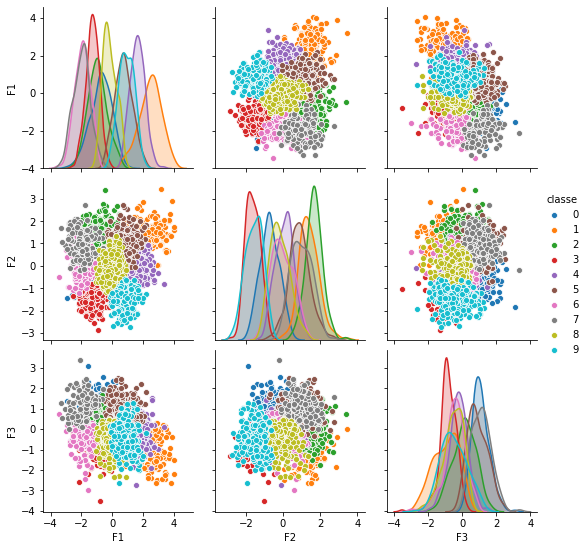

In [ ]:
sns.pairplot(data=data_mfeatFac_pca, hue='classe')
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

## Interpretation

In [ ]:
data_mfeatFac_pca['classe'].value_counts()

4    261
0    250
8    239
5    235
3    224
9    195
1    162
2    159
7    151
6    124
Name: classe, dtype: int64

# PCA sur mfeat-kar

In [ ]:
data_mfeaKar=pd.read_fwf('mfeat-kar', sep='\s+', header=None,names=['kar'+str(i) for i in range(64)])
data_mfeaKar

,kar0,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,...,kar54,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2.415248,-6.619806,5.053538,6.662300,12.136673,-1.447842,-2.321873,4.042169,-2.981806,-0.106785,...,-1.438355,-0.714285,0.017051,0.460572,-0.951763,0.241901,-0.399051,-0.304857,-0.068411,-1.049052
1996,5.892684,-8.185875,1.819305,6.871263,1.021332,-0.869375,-6.759738,-3.891993,-4.781352,3.355656,...,-0.672254,1.273016,0.227573,0.444086,1.439473,-0.405706,0.378187,-0.128056,0.925637,1.798053
1997,1.881613,-9.650881,0.317780,0.655888,7.882648,1.740497,0.026943,-4.412813,-3.403179,-0.614610,...,-0.121590,-1.622687,0.309964,0.473773,0.916683,0.971719,0.689472,-0.439637,0.287013,-0.420793
1998,-1.530886,-10.183775,-1.055864,4.956079,11.729954,1.480784,-2.806543,0.602515,-5.411981,-2.165543,...,-0.220936,-0.466334,0.128358,-0.888494,-0.014442,-0.780897,1.000286,1.405214,0.435514,-0.225426


In [ ]:
### Statistique univariée:
data_mfeaKar.describe().T

,count,mean,std,min,25%,50%,75%,max
kar0,2000.0,-1.119422,7.691305,-16.459305,-7.606095,-1.744261,4.806998,15.774811
kar1,2000.0,-0.684916,5.716466,-15.651466,-4.660418,-0.539887,3.409475,15.414573
kar2,2000.0,1.758363,5.453268,-9.989320,-2.095160,2.334200,5.583067,14.769929
kar3,2000.0,1.834943,5.444294,-9.879191,-2.109838,0.943386,5.523386,16.824829
kar4,2000.0,2.891171,3.994073,-8.213110,0.020924,2.693554,5.692744,14.992364
...,...,...,...,...,...,...,...,...
kar59,2000.0,-0.204876,1.050156,-3.624762,-0.940669,-0.204553,0.498455,3.351974
kar60,2000.0,-0.017153,0.907965,-3.056478,-0.647365,0.007285,0.585359,2.974369
kar61,2000.0,-0.049707,0.899926,-3.279887,-0.666966,-0.058137,0.521300,2.809290
kar62,2000.0,0.239816,0.892344,-2.617629,-0.393474,0.229076,0.849849,3.145101


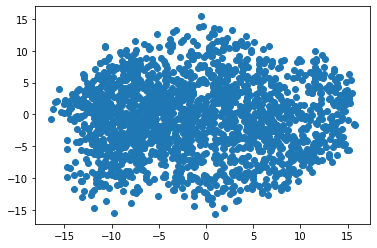

In [ ]:
plt.scatter(data_mfeaKar['kar0'],data_mfeaKar['kar1'])

### Standarisation de données

In [ ]:
mean_mfeaKar=data_mfeaKar.mean()
std_mfeaKar=data_mfeaKar.std()
data_mfeaKar_scaled=(data_mfeaKar-mean_mfeaKar)/std_mfeaKar
data_mfeaKar_scaled

,kar0,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,...,kar54,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63
0,-1.193242,-1.921095,1.797510,-0.719333,0.288799,0.930060,-0.282838,-2.096057,0.571098,1.274037,...,0.902490,0.764091,0.464197,-0.492496,0.463872,0.467959,0.402855,2.071724,-1.783134,-0.285103
1,-0.509223,-2.134259,-0.292890,-0.228217,0.058177,0.969106,-1.230444,-1.464265,0.001350,0.727240,...,0.771614,2.528290,1.424336,-2.163437,1.563296,0.101466,0.660279,0.595047,0.451210,0.776332
2,-1.107710,-1.044523,-0.251166,-0.652535,-0.648667,0.729636,-1.434295,-0.084827,-0.149144,1.438892,...,-0.535435,-0.062485,-0.072345,1.386566,-0.335698,-0.719149,2.217042,1.275055,0.658228,-1.548581
3,-0.719118,-1.112389,0.430198,-0.767358,0.151096,0.882735,-2.081990,-1.529535,-0.266373,0.678375,...,-1.063896,-0.955392,-0.256704,-1.812804,1.233543,0.057747,-1.577346,-0.959907,-1.133589,0.475468
4,-1.241025,-1.799926,-0.286795,-0.253671,-0.174780,-1.229319,-1.713585,-0.846463,0.768769,0.145287,...,0.010450,1.224399,-1.337083,-3.293685,-0.470744,1.651384,0.581027,0.386726,-1.325754,1.300440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.168479,-1.038210,0.604257,0.886682,2.314805,-0.686859,-0.224758,1.597186,-0.653147,0.358944,...,-1.523952,-0.667144,-0.028821,0.597563,-0.898241,0.425438,-0.420609,-0.283523,-0.345413,-0.846709
1996,0.911693,-1.312167,0.011175,0.925064,-0.468153,-0.517863,-1.316008,-0.743460,-1.083442,1.236665,...,-0.785250,1.071197,0.187710,0.581289,1.737265,-0.191239,0.435413,-0.087062,0.768562,1.933391
1997,0.390185,-1.568446,-0.264169,-0.216567,1.249721,0.244596,0.352805,-0.897106,-0.753903,0.230211,...,-0.254279,-1.461745,0.272453,0.610594,1.161071,1.120400,0.778252,-0.433291,0.052891,-0.233235
1998,-0.053497,-1.661666,-0.516062,0.573286,2.212975,0.168723,-0.343936,0.582459,-1.234234,-0.162947,...,-0.350071,-0.450256,0.085663,-0.734179,0.134830,-0.548510,1.120571,1.616712,0.219308,-0.042467


### Matrice de correlation

In [ ]:
cormat3=data_mfeaKar_scaled.corr()
cormat3

,kar0,kar1,kar2,kar3,kar4,kar5,kar6,kar7,kar8,kar9,...,kar54,kar55,kar56,kar57,kar58,kar59,kar60,kar61,kar62,kar63
kar0,1.000000,-0.000446,0.196833,0.124623,-0.096850,0.068977,-0.045946,0.287433,-0.177692,0.353387,...,0.058542,-0.235510,0.055715,0.211497,0.137962,-0.227596,-0.113014,-0.075176,-0.097831,-0.125565
kar1,-0.000446,1.000000,-0.129023,-0.007488,-0.268260,-0.061282,0.301624,0.060742,0.346143,-0.060430,...,0.049504,0.177281,0.062160,0.008755,0.000631,0.050994,-0.033116,-0.255998,-0.020407,0.049603
kar2,0.196833,-0.129023,1.000000,-0.124029,-0.132067,-0.145041,-0.118619,0.169713,-0.020501,0.232535,...,0.041928,-0.072652,-0.019088,0.062199,0.107004,-0.124450,-0.068486,-0.022140,-0.011861,-0.145053
kar3,0.124623,-0.007488,-0.124029,1.000000,0.237730,-0.008570,0.012033,-0.055422,0.063872,0.212284,...,0.066169,-0.055081,-0.001395,0.071532,-0.060961,0.066010,-0.064986,-0.018266,-0.088774,-0.065405
kar4,-0.096850,-0.268260,-0.132067,0.237730,1.000000,-0.017013,-0.047918,-0.028345,-0.246877,-0.107250,...,0.001199,-0.165588,-0.024801,0.032976,-0.036347,-0.061013,0.076835,0.190002,-0.017446,0.012563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kar59,-0.227596,0.050994,-0.124450,0.066010,-0.061013,-0.165645,-0.188354,-0.139273,0.081607,-0.106671,...,0.101797,0.171431,0.026198,-0.109637,-0.137989,1.000000,0.005344,0.020807,-0.038457,0.184934
kar60,-0.113014,-0.033116,-0.068486,-0.064986,0.076835,0.016559,-0.028217,-0.004451,-0.040725,-0.066072,...,0.009737,0.000688,-0.031514,0.070231,-0.025580,0.005344,1.000000,0.046971,0.050873,-0.004126
kar61,-0.075176,-0.255998,-0.022140,-0.018266,0.190002,0.023176,-0.121102,0.078203,-0.106762,-0.031711,...,-0.007276,0.091936,-0.075761,0.086809,0.015328,0.020807,0.046971,1.000000,-0.016216,0.008043
kar62,-0.097831,-0.020407,-0.011861,-0.088774,-0.017446,0.059039,0.111669,0.108441,-0.053409,-0.021814,...,0.022992,-0.087364,0.069445,0.055969,0.036380,-0.038457,0.050873,-0.016216,1.000000,-0.102389


In [ ]:
from numpy import linalg as LA 
egvalues3,egvectors3 = LA.eig(cormat3)
print('eigenvalues\n\n',egvalues3)
print('-'*90)
print('eigenvectors\n\n',egvectors3)

eigenvalues

 [5.83549271 4.96729672 3.53582196 3.224855   2.64753856 2.36548015
 2.09841143 1.91039685 1.701969   1.5223947  1.47543228 1.41329987
 1.37857161 1.30429148 1.25119305 1.16090115 0.02158107 1.09429909
 1.07302507 1.03543859 0.05814647 1.00947715 0.96194152 0.11200237
 0.93018737 0.90832836 0.86416343 0.17598298 0.79634588 0.80121014
 0.20649402 0.7752471  0.74627618 0.72776135 0.71774463 0.69397046
 0.68684288 0.6614141  0.24715032 0.25692214 0.2703259  0.6327995
 0.62790193 0.29702705 0.30660167 0.30828713 0.32584428 0.60139036
 0.35094492 0.35533267 0.36776938 0.38601437 0.39701152 0.57692895
 0.4222874  0.42672623 0.4457352  0.54742045 0.47050051 0.47967736
 0.4840299  0.50740312 0.52566904 0.53107196]
------------------------------------------------------------------------------------------
eigenvectors

 [[-0.15310319  0.19669977 -0.11094616 ...  0.06273032  0.01426634
  -0.00032726]
 [ 0.12502594  0.00534038 -0.21574869 ...  0.04402448  0.04856633
   0.05142022]
 [-

In [ ]:
pdv3=pd.DataFrame({'axe': np.arange(egvalues3.shape[0])+1,'eigenvalues':list(egvalues3)})

In [ ]:
pdv3['proportion']=pdv3['eigenvalues']/pdv3['eigenvalues'].sum()*100
pdv3['cumul']=pdv3['proportion'].cumsum()
pdv3

,axe,eigenvalues,proportion,cumul
0,1,5.835493,9.117957,9.117957
1,2,4.967297,7.761401,16.879358
2,3,3.535822,5.524722,22.404080
3,4,3.224855,5.038836,27.442916
4,5,2.647539,4.136779,31.579695
...,...,...,...,...
59,60,0.479677,0.749496,96.799728
60,61,0.484030,0.756297,97.556025
61,62,0.507403,0.792817,98.348842
62,63,0.525669,0.821358,99.170200


In [ ]:
def eigenvalues_de_Kaiser(egvalues,egvectors):
    liste=[]
    liste2=[]
    for i in range(len(egvalues)):
        if egvalues[i]>1:
            liste.append(egvalues[i])
            liste2.append(egvectors[i])
    return liste,liste2

In [ ]:
egvalues3,egvectors3=eigenvalues_de_Kaiser(egvalues3,egvectors3)
print("D'apres la regle de Kaiser, on a retenu seulement :",len(egvalues3),' valeurs propres')

D'apres la regle de Kaiser, on a retenu seulement : 20  valeurs propres


Text(0, 0.5, 'eigenvalues')

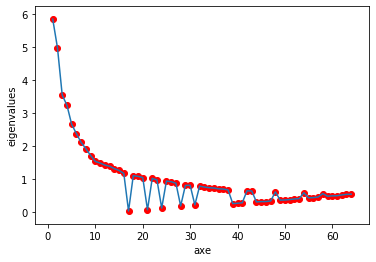

In [ ]:
plt.plot(pdv3['axe'],pdv3['eigenvalues'])
plt.scatter(pdv3['axe'],pdv3['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')

In [ ]:
# D'apres la regle coudes, on a retenu seulement le 3 premieres valeurs propres

In [ ]:
v_1,v_2,v_3=egvalues3[0:3]
u_1,u_2,u_3=egvectors3[0:3]

### composantes principales

In [ ]:
c_1=np.matmul(data_mfeaKar_scaled.values,u_1)
c_2=np.matmul(data_mfeaKar_scaled.values,u_2)
c_3=np.matmul(data_mfeaKar_scaled.values,u_3)

### Creation du nouveau DataFrame

In [ ]:
# nouveau dataframe from pca
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
pdseries3=pd.Series(c_3)
# data_mfeatZer_pca=pd.DataFrame(list(c_1),list(c_2),list(c_3))
# # # data_mfeatZer_pca['F1','F2','F3']=[c_1,c_2,c_3]
data_mfeaKar_pca=pd.DataFrame([pdseries1,pdseries2,pdseries3])
data_mfeaKar_pca=data_mfeaKar_pca.T
data_mfeaKar_pca.columns=['F1','F2','F3']
data_mfeaKar_pca

,F1,F2,F3
0,-0.231993,0.438827,-0.997526
1,0.170754,0.499121,-1.402182
2,-0.058385,1.050502,-0.182014
3,-0.014539,0.648861,-0.787722
4,0.410178,1.197871,-1.813313
...,...,...,...
1995,0.161095,-0.881727,-0.203345
1996,-0.233436,-0.095614,-2.060092
1997,0.516817,0.277642,0.274839
1998,-0.064877,-0.505813,-0.046189


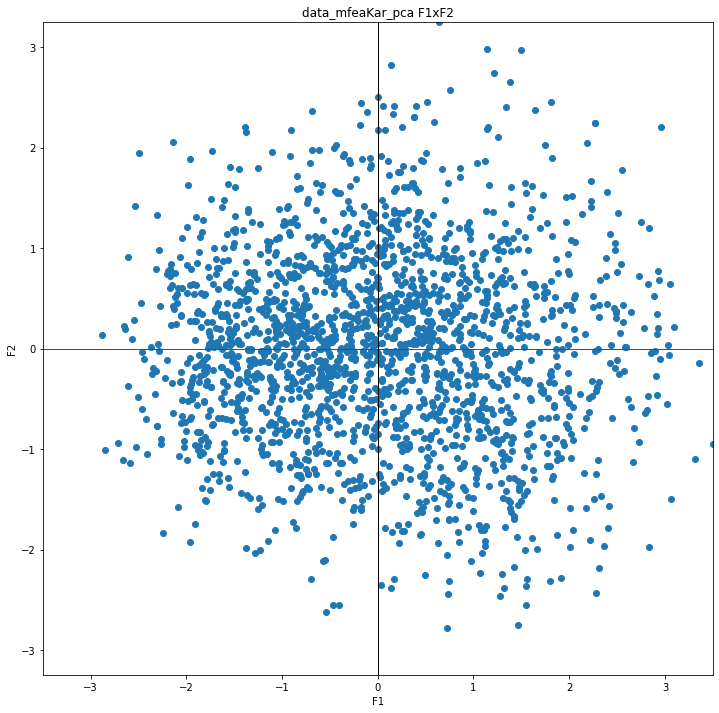

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeaKar_pca['F1'].max(),data_mfeaKar_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeaKar_pca['F2'].max(),data_mfeaKar_pca['F2'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeaKar_pca['F1'],y=data_mfeaKar_pca['F2']) 
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('data_mfeaKar_pca F1xF2')
 #ajouter les axes  
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

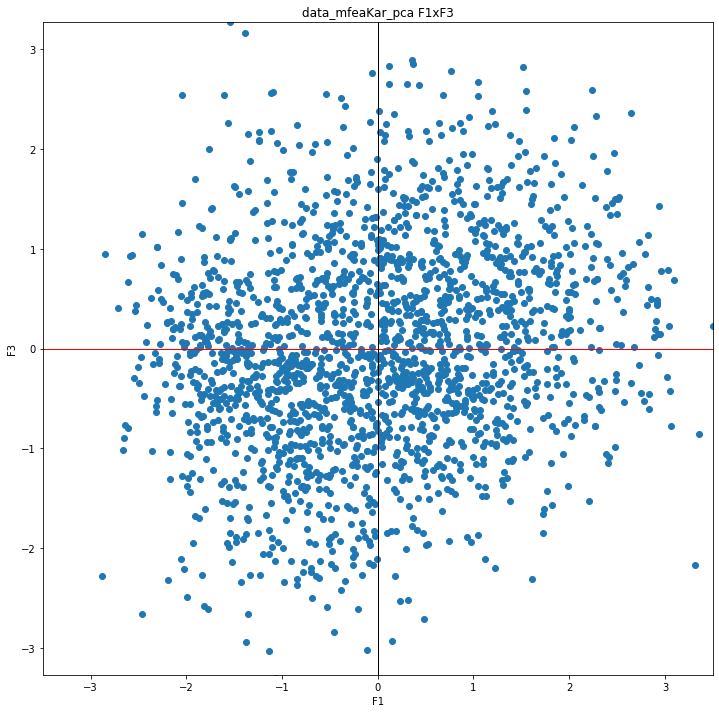

In [ ]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeaKar_pca['F1'].max(),data_mfeaKar_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeaKar_pca['F3'].max(),data_mfeaKar_pca['F3'].max()) #et en ordonnée

plt.scatter(x=data_mfeaKar_pca['F1'],y=data_mfeaKar_pca['F3']) 
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('data_mfeaKar_pca F1xF3')
 #ajouter les axes  
plt.plot([-10,10],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1) 
plt.show()

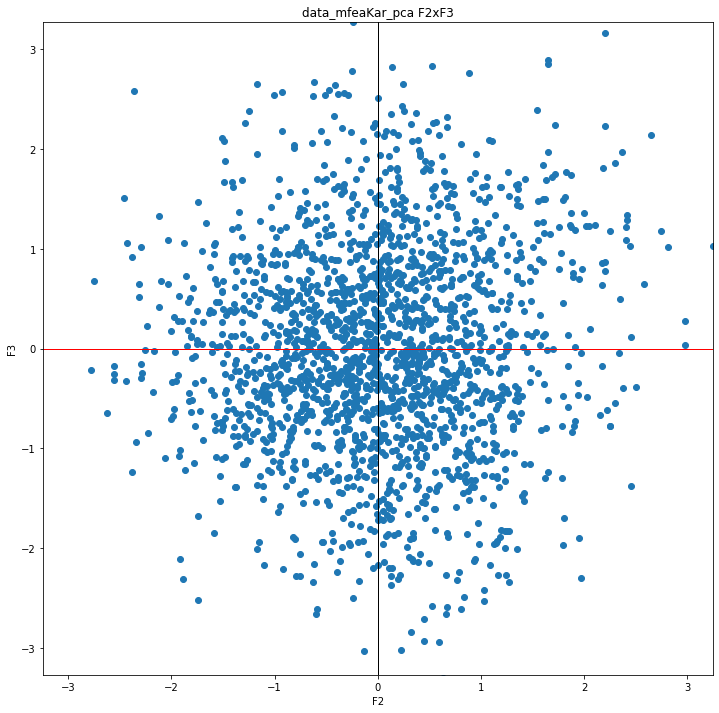

In [ ]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeaKar_pca['F2'].max(),data_mfeaKar_pca['F2'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeaKar_pca['F3'].max(),data_mfeaKar_pca['F3'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeaKar_pca['F2'],y=data_mfeaKar_pca['F3'],marker='o') 
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('data_mfeaKar_pca F2xF3')
 #ajouter les axes  
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

# CLUSTERING SUR mfeat-Kar

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data_mfeaKar_pca)
y_kmeans=kmeans.predict(data_mfeaKar_pca)
y_kmeans

array([7, 2, 4, ..., 2, 5, 5], dtype=int32)

In [ ]:
data_mfeaKar_pca['classe']=y_kmeans
data_mfeaKar_pca

,F1,F2,F3,classe
0,-0.231993,0.438827,-0.997526,7
1,0.170754,0.499121,-1.402182,2
2,-0.058385,1.050502,-0.182014,4
3,-0.014539,0.648861,-0.787722,2
4,0.410178,1.197871,-1.813313,7
...,...,...,...,...
1995,0.161095,-0.881727,-0.203345,5
1996,-0.233436,-0.095614,-2.060092,7
1997,0.516817,0.277642,0.274839,2
1998,-0.064877,-0.505813,-0.046189,5


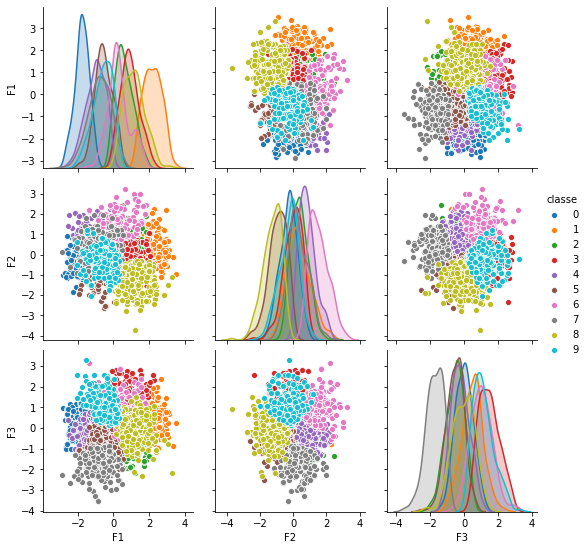

In [ ]:
sns.pairplot(data=data_mfeaKar_pca,hue='classe')

# Interpretations

In [ ]:
data_mfeaKar_pca['classe'].value_counts()

2    287
8    247
0    239
5    205
4    202
7    195
9    178
3    160
1    148
6    139
Name: classe, dtype: int64

# PCA sur data_mfeatMor

In [ ]:
data_mfeatMor=pd.read_fwf('mfeat-mor', sep='\s+', header=None,names=['mor'+str(i) for i in range(6)])
data_mfeatMor

,mor0,mor1,mor2,mor3,mor4,mor5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...
1995,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [ ]:
### Statistique univariée:
data_mfeatMor.describe().T

,count,mean,std,min,25%,50%,75%,max
mor0,2000.0,0.492500,0.664955,0.000000,0.000000,0.000000,1.000000,2.000000
mor1,2000.0,1.733500,1.141985,0.000000,1.000000,2.000000,3.000000,6.000000
mor2,2000.0,0.713500,0.699759,0.000000,0.000000,1.000000,1.000000,5.000000
mor3,2000.0,156.418886,25.010014,99.508861,135.014361,150.063861,175.728861,231.276861
mor4,2000.0,1.639569,0.291316,1.143130,1.363562,1.625846,1.881523,2.558830
mor5,2000.0,4225.200435,2561.220249,7.793280,2030.089315,3631.431972,5937.008638,9992.607526


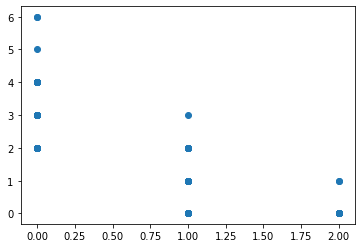

In [ ]:
plt.scatter(data_mfeatMor['mor0'],data_mfeatMor['mor1'])

### Standarisation de données

In [ ]:
mean_mfeatMor=data_mfeatMor.mean()
std_mfeatMor=data_mfeatMor.std()
data_mfeatMor_scaled=(data_mfeatMor-mean_mfeatMor)/std_mfeatMor
data_mfeatMor_scaled

,mor0,mor1,mor2,mor3,mor4,mor5
0,0.76321,-1.517971,-1.019637,-0.930348,-1.125501,-1.017085
1,0.76321,-1.517971,-1.019637,-1.187285,-1.156216,-1.021336
2,0.76321,-1.517971,-1.019637,-1.009397,-1.100311,-1.037092
3,0.76321,-1.517971,-1.019637,-1.077170,-1.265605,-0.987867
4,0.76321,-1.517971,-1.019637,-1.165774,-1.063905,-1.006349
...,...,...,...,...,...,...
1995,0.76321,-0.642303,0.409427,0.043182,0.055695,0.429805
1996,0.76321,-0.642303,0.409427,-0.160497,-0.065989,0.397493
1997,0.76321,-0.642303,0.409427,-0.869493,-0.334968,-0.178992
1998,0.76321,-0.642303,0.409427,-0.539465,-0.731810,-0.041727


### matrice de correlation

In [ ]:
cormat4=data_mfeatMor_scaled.corr()
cormat4.head()

,mor0,mor1,mor2,mor3,mor4,mor5
mor0,1.000000,-0.850143,0.516263,-0.609249,-0.666205,-0.419968
mor1,-0.850143,1.000000,-0.001067,0.616539,0.674785,0.472023
mor2,0.516263,-0.001067,1.000000,-0.143836,-0.164682,-0.032200
mor3,-0.609249,0.616539,-0.143836,1.000000,0.937760,0.219574
mor4,-0.666205,0.674785,-0.164682,0.937760,1.000000,0.336861


In [ ]:
from numpy import linalg as LA 
egvalues4,egvectors4 = LA.eig(cormat4)
print('eigenvalues\n\n',egvalues4)
print('-'*90)
print('eigenvectors\n\n',egvectors4)

eigenvalues

 [3.464751   1.10748861 0.89333017 0.47510315 0.00576488 0.0535622 ]
------------------------------------------------------------------------------------------
eigenvectors

 [[ 0.48622068 -0.26070867 -0.16781786  0.40379078  0.70888142  0.04356305]
 [-0.46731845 -0.23382263  0.13147161 -0.5897947   0.60149279  0.00207037]
 [ 0.16446563 -0.8903755  -0.11830336 -0.17781069 -0.36682911 -0.00256992]
 [-0.45503877 -0.09339376 -0.47397188  0.31678997  0.02671886 -0.67712495]
 [-0.48186764 -0.10311945 -0.34101     0.32864499 -0.02018619  0.72970345]
 [-0.28088657 -0.25540835  0.77435104  0.49911437  0.00292751 -0.08441595]]


In [ ]:
pdv4=pd.DataFrame({'axe': np.arange(egvalues4.shape[0])+1,'eigenvalues':list(egvalues4)})

In [ ]:
pdv4['proportion']=pdv4['eigenvalues']/pdv4['eigenvalues'].sum()*100
pdv4['cumul']=pdv4['proportion'].cumsum()
pdv4

,axe,eigenvalues,proportion,cumul
0,1,3.464751,57.745850,57.745850
1,2,1.107489,18.458144,76.203994
2,3,0.893330,14.888836,91.092830
3,4,0.475103,7.918386,99.011215
4,5,0.005765,0.096081,99.107297
5,6,0.053562,0.892703,100.000000


In [ ]:
egvalues4,egvectors4=eigenvalues_de_Kaiser(egvalues4,egvectors4)

In [ ]:
print("D'apres la regle de Kaiser on a retenu seulement:",len(egvalues4)," valeurs propres")

D'apres la regle de Kaiser on a retenu seulement: 2  valeurs propres


In [ ]:
v_1,v_2=egvalues4[0:2]
u_1,u_2=egvectors4[0:2]

In [ ]:
c_1=np.matmul(data_mfeatMor_scaled.values,u_1)
c_2=np.matmul(data_mfeatMor_scaled.values,u_2)

In [ ]:
data_mfeatMor_pca=pd.DataFrame([pdseries1,pdseries2])
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
data_mfeatMor_pca=pd.DataFrame([pdseries1,pdseries2])
data_mfeatMor_pca=data_mfeatMor_pca.T
data_mfeatMor_pca.columns=['F1','F2']
data_mfeatMor_pca

,F1,F2
0,-0.279870,-0.266151
1,-0.405577,-0.133095
2,-0.294804,-0.204419
3,-0.437200,-0.263768
4,-0.330801,-0.090226
...,...,...
1995,0.545475,-0.143727
1996,0.375564,-0.096858
1997,-0.126510,0.158322
1998,-0.268582,-0.274741


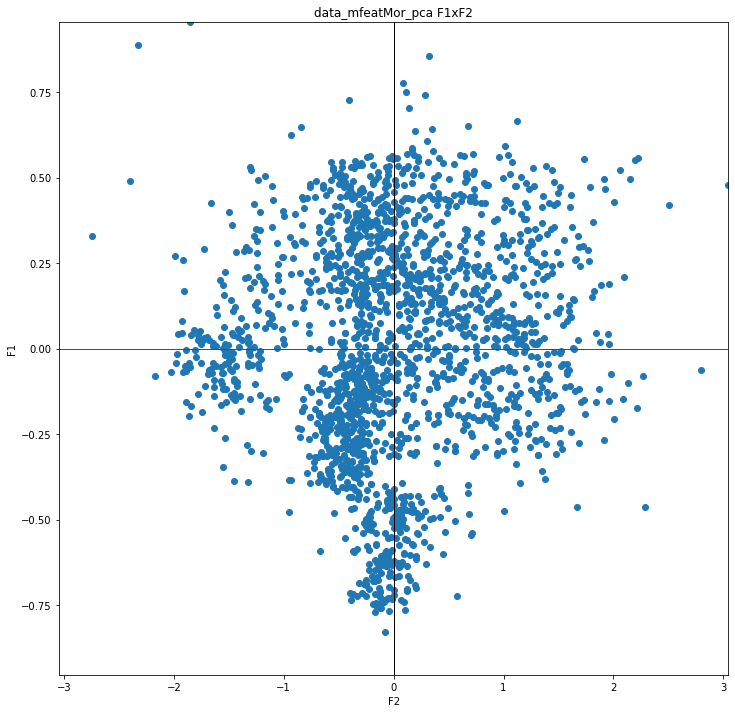

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeatMor_pca['F1'].max(),data_mfeatMor_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatMor_pca['F2'].max(),data_mfeatMor_pca['F2'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeatMor_pca['F1'],y=data_mfeatMor_pca['F2']) 
plt.xlabel('F2')
plt.ylabel('F1')
plt.title('data_mfeatMor_pca F1xF2')
 #ajouter les axes  
plt.plot([-5,5],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

# CLUSTERING sur mfeat-Mor

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data_mfeatMor_pca)
y_kmeans=kmeans.predict(data_mfeatMor_pca)
y_kmeans

array([9, 9, 9, ..., 3, 9, 8], dtype=int32)

In [ ]:
data_mfeatMor_pca['classe']=y_kmeans
data_mfeatMor_pca

,F1,F2,classe
0,-0.279870,-0.266151,9
1,-0.405577,-0.133095,9
2,-0.294804,-0.204419,9
3,-0.437200,-0.263768,9
4,-0.330801,-0.090226,9
...,...,...,...
1995,0.545475,-0.143727,5
1996,0.375564,-0.096858,5
1997,-0.126510,0.158322,3
1998,-0.268582,-0.274741,9


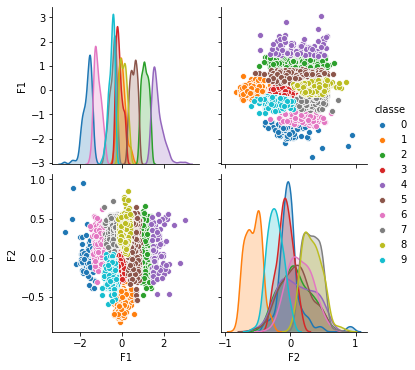

In [ ]:
sns.pairplot(data=data_mfeatMor_pca,hue='classe')

### Interprétation

In [ ]:
data_mfeatMor_pca['classe'].value_counts()

9    321
5    244
8    229
3    227
2    222
7    220
1    217
0    115
6    103
4    102
Name: classe, dtype: int64

# PCA sur mfeat-pix

In [ ]:
data_mfeatpix=pd.read_fwf('mfeat-pix', sep='\s+')
liste=['pix'+str(i) for i in range (data_mfeatpix.shape[1])]
data_mfeatpix.columns =liste
data_mfeatpix

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix230,pix231,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239
0,0,0,0,0,0,0,1,3,4,4,...,2,4,4,4,4,2,0,0,0,0
1,0,0,1,4,4,4,4,4,4,3,...,1,3,4,4,4,4,4,2,1,0
2,0,0,3,3,2,2,4,5,6,6,...,4,4,4,4,2,0,0,0,0,0
3,0,0,0,0,0,0,3,4,6,6,...,4,4,4,4,3,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,5,...,4,4,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,1,3,4,5,6,4,4,...,4,4,4,4,4,4,4,0,0,0
1995,0,0,0,0,3,6,6,6,6,6,...,4,4,4,3,0,0,0,0,0,0
1996,0,0,0,2,4,4,4,6,4,4,...,0,2,4,4,4,1,0,0,0,0
1997,0,0,0,0,0,0,2,4,4,5,...,3,4,4,4,4,2,0,0,0,0


In [ ]:
data_mfeatpix.describe().T

,count,mean,std,min,25%,50%,75%,max
pix0,1999.0,0.547274,1.368398,0.0,0.0,0.0,0.0,6.0
pix1,1999.0,1.334667,2.129105,0.0,0.0,0.0,3.0,6.0
pix2,1999.0,2.088544,2.408000,0.0,0.0,1.0,4.0,6.0
pix3,1999.0,2.770385,2.437570,0.0,0.0,3.0,5.0,6.0
pix4,1999.0,3.395198,2.385915,0.0,0.0,4.0,6.0,6.0
...,...,...,...,...,...,...,...,...
pix235,1999.0,2.512756,1.764887,0.0,0.0,4.0,4.0,4.0
pix236,1999.0,2.086543,1.825472,0.0,0.0,2.0,4.0,4.0
pix237,1999.0,1.512256,1.793025,0.0,0.0,0.0,4.0,4.0
pix238,1999.0,0.918459,1.547983,0.0,0.0,0.0,1.0,4.0


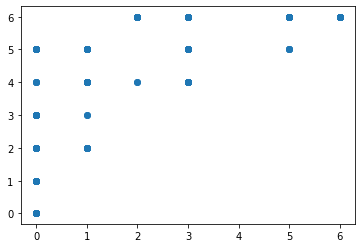

In [ ]:
plt.scatter(data_mfeatpix['pix0'],data_mfeatpix['pix1'])

In [ ]:
mean_mfeatpix=data_mfeatpix.mean()
std_mfeatpix=data_mfeatpix.std()
data_mfeatpix_scaled=(data_mfeatpix-mean_mfeatpix)/std_mfeatpix
data_mfeatpix_scaled

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix230,pix231,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239
0,-0.399937,-0.626868,-0.867336,-1.136536,-1.423017,-1.711974,-1.483367,-0.601881,-0.086762,0.023840,...,-0.369544,0.675282,0.648560,0.660964,0.741885,-0.290532,-1.143016,-0.843410,-0.593327,-0.368318
1,-0.399937,-0.626868,-0.452053,0.504443,0.253489,0.072997,-0.071567,-0.114377,-0.086762,-0.430022,...,-0.934745,0.087863,0.648560,0.660964,0.741885,0.842685,1.048199,0.272023,0.052676,-0.368318
2,-0.399937,-0.626868,0.378512,0.094198,-0.584764,-0.819489,-0.071567,0.373127,0.879461,0.931563,...,0.760859,0.675282,0.648560,0.660964,-0.453623,-1.423749,-1.143016,-0.843410,-0.593327,-0.368318
3,-0.399937,-0.626868,-0.867336,-1.136536,-1.423017,-1.711974,-0.542167,-0.114377,0.879461,0.931563,...,0.760859,0.675282,0.648560,0.660964,0.144131,-0.857140,-1.143016,-0.843410,-0.593327,-0.368318
4,-0.399937,-0.626868,-0.867336,-1.136536,-1.423017,-1.711974,-1.953967,-2.064393,-2.019208,0.477701,...,0.760859,0.675282,-0.570501,-1.766719,-1.649132,-1.423749,-1.143016,-0.843410,-0.593327,-0.368318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.399937,-0.626868,-0.867336,-0.726291,-0.165638,0.072997,0.399033,0.860631,-0.086762,0.023840,...,0.760859,0.675282,0.648560,0.660964,0.741885,0.842685,1.048199,-0.843410,-0.593327,-0.368318
1995,-0.399937,-0.626868,-0.867336,-1.136536,-0.165638,0.965483,0.869633,0.860631,0.879461,0.931563,...,0.760859,0.675282,0.648560,0.054043,-1.649132,-1.423749,-1.143016,-0.843410,-0.593327,-0.368318
1996,-0.399937,-0.626868,-0.867336,-0.316046,0.253489,0.072997,-0.071567,0.860631,-0.086762,0.023840,...,-1.499947,-0.499556,0.648560,0.660964,0.741885,-0.857140,-1.143016,-0.843410,-0.593327,-0.368318
1997,-0.399937,-0.626868,-0.867336,-1.136536,-1.423017,-1.711974,-1.012767,-0.114377,-0.086762,0.477701,...,0.195658,0.675282,0.648560,0.660964,0.741885,-0.290532,-1.143016,-0.843410,-0.593327,-0.368318


### Matrice de correlation

In [ ]:
cormat5=data_mfeatpix_scaled.corr()
cormat5

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix230,pix231,pix232,pix233,pix234,pix235,pix236,pix237,pix238,pix239
pix0,1.000000,0.801717,0.591792,0.442826,0.313442,0.230455,0.181356,0.153760,0.138274,0.146823,...,-0.009775,0.030216,0.011158,-0.034094,-0.097776,-0.153142,-0.136783,-0.125536,-0.099661,-0.056717
pix1,0.801717,1.000000,0.854664,0.652658,0.452986,0.312545,0.211104,0.146922,0.126611,0.132313,...,0.049238,0.090871,0.051846,-0.025600,-0.094244,-0.144389,-0.122066,-0.104714,-0.081769,-0.020641
pix2,0.591792,0.854664,1.000000,0.870822,0.633941,0.452621,0.295014,0.185679,0.126242,0.103796,...,0.118448,0.159391,0.113303,0.032642,-0.049364,-0.104315,-0.079966,-0.068007,-0.059961,0.009372
pix3,0.442826,0.652658,0.870822,1.000000,0.852699,0.636793,0.410647,0.224189,0.107472,0.055811,...,0.165502,0.191696,0.140498,0.058462,-0.033221,-0.090006,-0.068081,-0.061022,-0.054573,0.013362
pix4,0.313442,0.452986,0.633941,0.852699,1.000000,0.857393,0.591018,0.330792,0.135408,0.038416,...,0.199837,0.212583,0.163356,0.085727,-0.018121,-0.085707,-0.074737,-0.071329,-0.070004,-0.024684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix235,-0.153142,-0.144389,-0.104315,-0.090006,-0.085707,-0.067872,-0.074319,-0.079008,-0.094818,-0.123968,...,-0.142360,-0.081741,0.111428,0.402280,0.750641,1.000000,0.817189,0.551025,0.336092,0.161306
pix236,-0.136783,-0.122066,-0.079966,-0.068081,-0.074737,-0.084507,-0.120293,-0.141226,-0.155117,-0.188015,...,-0.252765,-0.235806,-0.105606,0.136518,0.457698,0.817189,1.000000,0.830832,0.579373,0.347099
pix237,-0.125536,-0.104714,-0.068007,-0.061022,-0.071329,-0.093359,-0.131589,-0.157615,-0.173409,-0.219327,...,-0.289588,-0.293972,-0.224832,-0.059603,0.214561,0.551025,0.830832,1.000000,0.805414,0.505710
pix238,-0.099661,-0.081769,-0.059961,-0.054573,-0.070004,-0.086809,-0.107607,-0.132995,-0.148349,-0.198774,...,-0.302701,-0.323138,-0.283678,-0.182597,0.033570,0.336092,0.579373,0.805414,1.000000,0.726778


In [ ]:
egvalues5,egvectors5 = LA.eig(cormat5)
print('eigenvalues\n\n',egvalues5)
print('-'*90)
print('eigenvectors\n\n',egvectors5)

eigenvalues

 [3.87284666e+01 2.33953266e+01 2.10785403e+01 1.51467889e+01
 1.30782078e+01 1.02463364e+01 8.95636405e+00 7.22924453e+00
 7.09734709e+00 6.01965299e+00 4.71065577e+00 4.42731340e+00
 4.09162429e+00 3.72894930e+00 3.46112548e+00 3.14749551e+00
 2.94101837e+00 2.71941184e+00 2.48219270e+00 2.40171569e+00
 2.13661603e+00 1.94770211e+00 1.89895052e+00 1.81388924e+00
 1.63600319e+00 1.46869462e+00 1.37821026e+00 1.23280004e+00
 1.21754794e+00 1.14382444e+00 1.12056116e+00 1.11270335e+00
 1.01319256e+00 9.07230027e-01 8.62128914e-01 8.45069852e-01
 8.26558013e-01 7.54900933e-01 7.41512929e-01 7.30018672e-01
 6.84232195e-01 6.64632976e-01 6.36162234e-01 6.00344614e-01
 5.64136664e-01 5.50635363e-01 5.38483823e-01 5.17989820e-01
 5.11108059e-01 4.99135130e-01 4.69113249e-01 4.57289544e-01
 4.48482830e-01 4.29282258e-01 4.19273872e-01 4.08643842e-01
 3.93282680e-01 3.87510565e-01 3.77809135e-01 3.72758030e-01
 3.64275477e-01 3.55527269e-01 3.51353742e-01 3.45266951e-01
 3.4047571

In [ ]:
pdv5=pd.DataFrame({'axe': np.arange(egvalues5.shape[0])+1,'eigenvalues':list(egvalues5)})
pdv5['proportion']=pdv5['eigenvalues']/pdv5['eigenvalues'].sum()*100
pdv5['cumul']=pdv5['proportion'].cumsum()
pdv5

,axe,eigenvalues,proportion,cumul
0,1,38.728467,16.136861,16.136861
1,2,23.395327,9.748053,25.884914
2,3,21.078540,8.782725,34.667639
3,4,15.146789,6.311162,40.978801
4,5,13.078208,5.449253,46.428054
...,...,...,...,...
235,236,0.050106,0.020877,99.915203
236,237,0.050827,0.021178,99.936381
237,238,0.050671,0.021113,99.957494
238,239,0.048866,0.020361,99.977855


In [ ]:
egvalues5,egvectors5=eigenvalues_de_Kaiser(egvalues5,egvectors5)
print("D'apres la regle de Kaiseur on a retenu seulement ",len(egvalues5), ' valeurs propres')

D'apres la regle de Kaiseur on a retenu seulement  33  valeurs propres


Text(0, 0.5, 'eigenvalues')

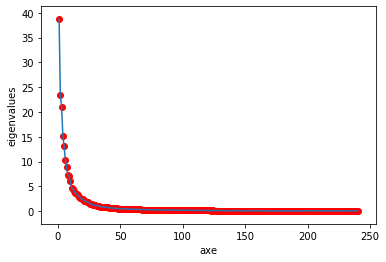

In [ ]:
plt.plot(pdv5['axe'],pdv5['eigenvalues'])
plt.scatter(pdv5['axe'],pdv5['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')

In [ ]:
print("D'apres la regle de coudes nous n'en retenons que 3")

D'apres la regle de coudes nous n'en retenons que 3


In [ ]:
v_1,v_2,v_3=egvalues5[0:3]
u_1,u_2,u_3=egvectors5[0:3]

In [ ]:
c_1=np.matmul(data_mfeatpix_scaled.values,u_1)
c_2=np.matmul(data_mfeatpix_scaled.values,u_2)
c_3=np.matmul(data_mfeatpix_scaled.values,u_3)

In [ ]:
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
pdseries3=pd.Series(c_3)
# data_mfeatZer_pca=pd.DataFrame(list(c_1),list(c_2),list(c_3))
# # # data_mfeatZer_pca['F1','F2','F3']=[c_1,c_2,c_3]
data_mfeatpix_pca=pd.DataFrame([pdseries1,pdseries2,pdseries3])
data_mfeatpix_pca=data_mfeatpix_pca.T
data_mfeatpix_pca.columns=['F1','F2','F3']
data_mfeatpix_pca

,F1,F2,F3
0,-0.423928,-1.671897,0.513729
1,0.120036,-1.207399,-0.031376
2,0.277558,-2.519138,-0.065343
3,-0.056621,-2.009236,0.490987
4,0.614028,-1.462827,2.117562
...,...,...,...
1994,-0.222290,0.204247,-0.490714
1995,0.260568,0.006901,-0.281345
1996,0.599714,-0.786701,-0.545746
1997,-0.362425,0.107679,-0.735035


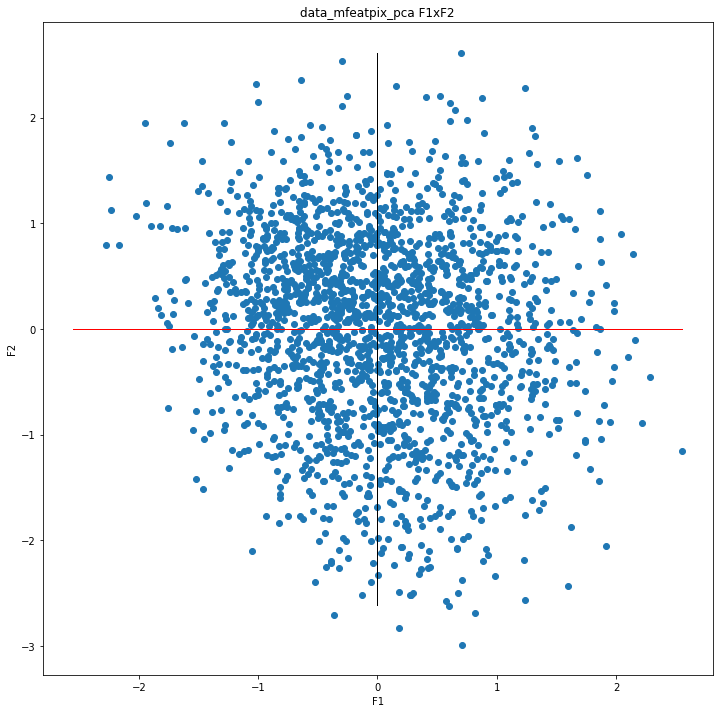

In [ ]:
#positionnement des individus dans le premier plan
plt.figure(figsize=(12,12))
axes.set_xlim(-data_mfeatpix_pca['F1'].max(),data_mfeatpix_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatpix_pca['F2'].max(),data_mfeatpix_pca['F2'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeatpix_pca['F1'],y=data_mfeatpix_pca['F2']) 
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('data_mfeatpix_pca F1xF2')
 #ajouter les axes  
plt.plot([-data_mfeatpix_pca['F1'].max(),data_mfeatpix_pca['F1'].max()],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-data_mfeatpix_pca['F2'].max(),data_mfeatpix_pca['F2'].max()],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

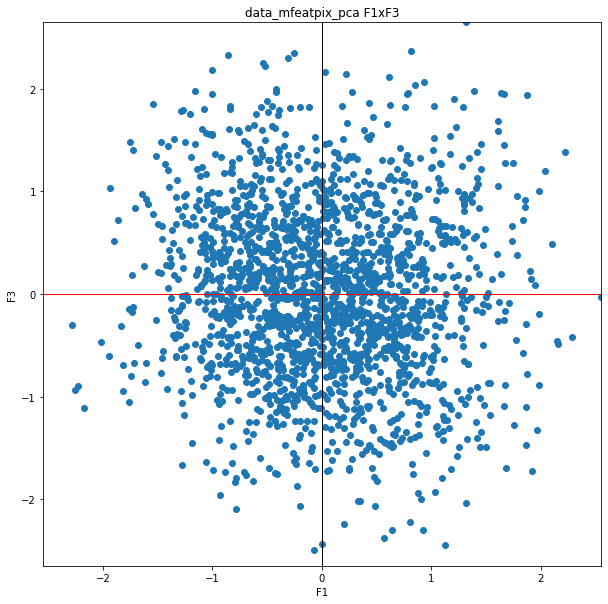

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-data_mfeatpix_pca['F1'].max(),data_mfeatpix_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatpix_pca['F3'].max(),data_mfeatpix_pca['F3'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeatpix_pca['F1'],y=data_mfeatpix_pca['F3']) 
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('data_mfeatpix_pca F1xF3')
 #ajouter les axes  
plt.plot([-data_mfeatpix_pca['F1'].max(),data_mfeatpix_pca['F1'].max()],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-data_mfeatpix_pca['F3'].max(),data_mfeatpix_pca['F3'].max()],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

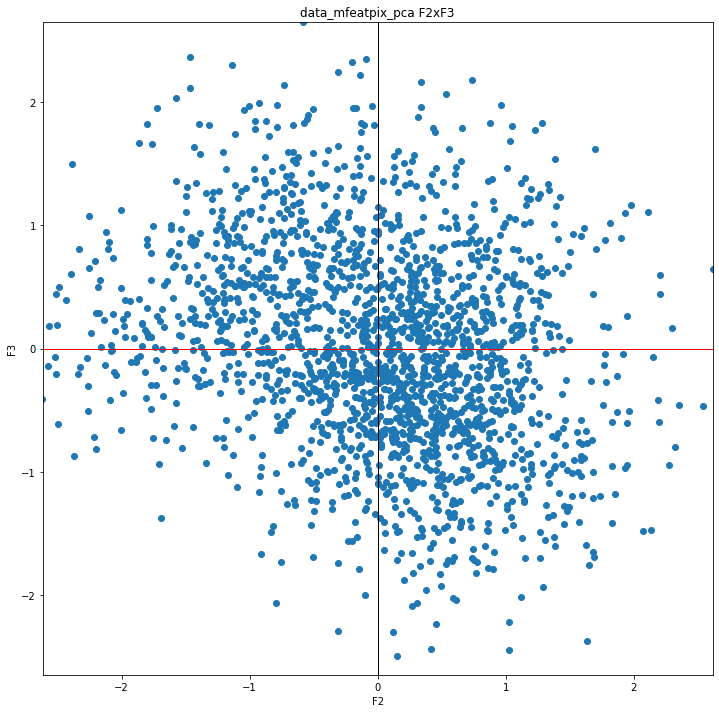

In [ ]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeatpix_pca['F2'].max(),data_mfeatpix_pca['F2'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatpix_pca['F3'].max(),data_mfeatpix_pca['F3'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeatpix_pca['F2'],y=data_mfeatpix_pca['F3']) 
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('data_mfeatpix_pca F2xF3')
 #ajouter les axes  
plt.plot([-8,8],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

In [ ]:
# CLUSTERING SUR mfeat-pix

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data_mfeatpix_pca)
y_kmeans=kmeans.predict(data_mfeatpix_pca)
data_mfeatpix_pca['classe']=y_kmeans

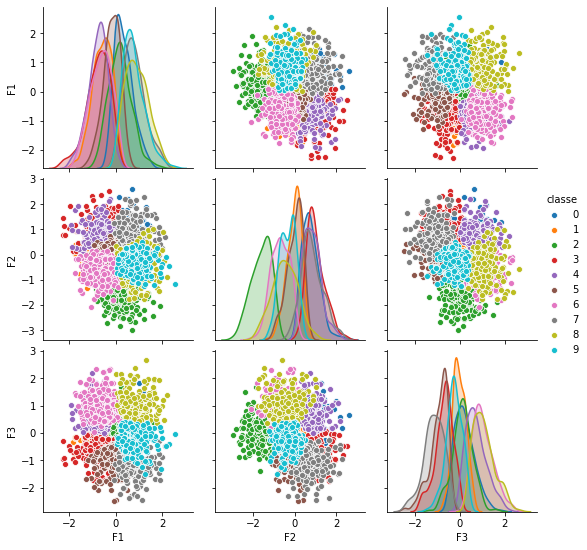

In [ ]:
sns.pairplot(data=data_mfeatpix_pca, hue='classe')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Interprétations

In [ ]:
data_mfeatpix_pca['classe'].value_counts()

1    258
9    221
2    220
0    216
5    209
6    196
3    186
4    167
8    165
7    161
Name: classe, dtype: int64

# PCA sur mfeat-fou

In [ ]:
data_mfeatfou=pd.read_fwf('mfeat-fou', sep='\s+')
liste=['fou'+str(i) for i in range (data_mfeatfou.shape[1])]
data_mfeatfou.columns =liste
data_mfeatfou

,fou0,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,...,fou66,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75
0,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
1,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
2,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
3,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403
4,0.068159,0.351293,0.128993,0.057838,0.515568,0.036970,0.501015,0.088189,0.333595,0.177476,...,0.066418,0.042722,0.043923,0.182893,0.028059,0.278417,0.027575,0.456644,0.059726,0.353545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,0.108996,0.197440,0.197778,0.205866,0.138887,0.160848,0.126190,0.247345,0.239117,0.136807
1995,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,0.212160,0.161606,0.033621,0.173155,0.295227,0.259417,0.345691,0.068303,0.158352,0.282327
1996,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,0.236628,0.121659,0.316333,0.244846,0.132893,0.042988,0.250740,0.141576,0.038776,0.114591
1997,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,0.155442,0.168154,0.147167,0.268675,0.199125,0.128708,0.285220,0.230322,0.103664,0.130003


In [ ]:
data_mfeatfou.describe().T

,count,mean,std,min,25%,50%,75%,max
fou0,1999.0,0.185604,0.091882,0.004928,0.112432,0.176341,0.270318,0.395772
fou1,1999.0,0.377401,0.176229,0.009000,0.223640,0.401568,0.523768,0.771281
fou2,1999.0,0.269460,0.137965,0.005624,0.142258,0.288432,0.378625,0.665372
fou3,1999.0,0.265684,0.110722,0.010114,0.195201,0.255565,0.325005,0.748012
fou4,1999.0,0.300209,0.156135,0.002090,0.180358,0.282455,0.413149,0.796487
...,...,...,...,...,...,...,...,...
fou71,1999.0,0.166614,0.091176,0.007784,0.097967,0.149119,0.218527,0.457965
fou72,1999.0,0.231052,0.123397,0.003569,0.130863,0.232581,0.323225,0.601370
fou73,1999.0,0.267722,0.131011,0.011433,0.157844,0.251584,0.388303,0.620857
fou74,1999.0,0.144029,0.085658,0.001136,0.075944,0.130468,0.198743,0.510432


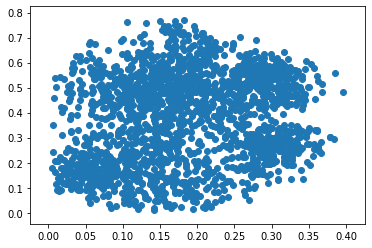

In [ ]:
plt.scatter(data_mfeatfou['fou0'],data_mfeatfou['fou1'])

## Standarisation de données

In [ ]:
mean_mfeatfou=data_mfeatfou.mean()
std_mfeatfou=data_mfeatfou.std()
data_mfeatfou_scaled=(data_mfeatfou-mean_mfeatfou)/std_mfeatfou
data_mfeatfou_scaled

,fou0,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,...,fou66,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75
0,-1.485189,-1.143003,-1.188313,-0.348525,1.915461,-1.316355,0.459407,-1.215236,0.328839,-1.056232,...,-1.135857,-0.911482,-1.238493,0.826725,-1.184448,1.854055,-1.696421,1.355263,-0.701053,1.109492
1,-1.648118,-0.849758,-1.164744,-1.246252,2.000096,-1.144030,0.733386,-1.658542,0.307516,-1.229287,...,-1.505573,1.395102,-1.285772,2.057276,-1.165110,2.311946,-1.450224,1.353370,-0.849834,0.355850
2,-1.341590,-0.904627,-1.371484,0.215927,1.576245,-1.265098,0.421089,-1.812469,0.369513,-0.375202,...,-0.573899,-0.662446,-0.773685,-0.359621,-0.838875,1.391238,-1.688672,1.072947,-0.945838,1.494206
3,-1.345582,-1.015965,-1.146819,-0.110400,1.974229,-1.513949,0.349770,-1.255082,0.178499,-1.176852,...,-1.488937,-0.331028,-1.382577,0.760685,-1.521743,2.409202,-1.552473,1.274534,-0.873361,1.526977
4,-1.278219,-0.148148,-1.018134,-1.877186,1.379315,-1.364069,0.943749,-1.284775,0.387980,0.294734,...,-0.829226,-1.322117,-1.254587,-0.000262,-1.381434,1.226234,-1.648962,1.442029,-0.984183,1.105041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.149434,-0.884508,1.138038,-1.702134,-0.229258,0.695482,0.608275,-0.695905,0.588043,-0.801348,...,-0.210732,1.064907,0.437184,0.265931,-0.125876,-0.063232,-0.849791,-0.155536,1.110085,-0.658395
1995,-0.365454,-0.170014,0.391934,-1.607435,0.812552,1.744693,0.047150,0.124972,0.929937,-0.313981,...,1.287870,0.512057,-1.367866,-0.113099,1.645289,1.017842,0.929019,-1.522151,0.167209,0.525593
1996,1.632551,-0.334648,-0.083443,-0.364001,0.752939,-0.396713,-0.216665,0.765130,0.944847,-0.828168,...,1.643307,-0.104250,1.740791,0.717595,-0.193782,-1.355890,0.159549,-0.962865,-1.228754,-0.839156
1997,0.743405,-1.170060,0.240361,-0.764241,0.167636,0.107690,0.364745,1.225582,-0.193779,-0.626567,...,0.463971,0.613082,-0.119324,0.993707,0.556553,-0.415738,0.438970,-0.285476,-0.471230,-0.713761


## Matrice de corrélation

In [ ]:
cormat6=data_mfeatfou_scaled.corr()
cormat6

,fou0,fou1,fou2,fou3,fou4,fou5,fou6,fou7,fou8,fou9,...,fou66,fou67,fou68,fou69,fou70,fou71,fou72,fou73,fou74,fou75
fou0,1.000000,0.194923,0.432002,-0.054392,-0.129510,0.140881,-0.179535,0.635257,-0.318123,-0.070156,...,0.390357,0.270031,0.380746,0.274834,0.465163,-0.285152,0.360113,-0.121924,0.104703,-0.293323
fou1,0.194923,1.000000,0.240158,0.401758,-0.330908,0.353990,-0.184384,0.180864,-0.057161,0.258117,...,0.097895,0.035810,0.130703,0.046944,0.228658,-0.271245,0.466015,-0.136883,0.331981,-0.095774
fou2,0.432002,0.240158,1.000000,-0.230920,0.046905,0.190951,-0.275181,0.562262,-0.311732,0.092440,...,0.342355,0.266846,0.337172,0.203207,0.504852,-0.253391,0.570242,-0.192525,0.214583,-0.306035
fou3,-0.054392,0.401758,-0.230920,1.000000,-0.190756,-0.031709,-0.247885,-0.251153,-0.027297,0.026599,...,-0.184794,-0.182391,-0.127464,-0.113346,-0.185003,0.004432,-0.111289,0.029356,0.097786,0.170090
fou4,-0.129510,-0.330908,0.046905,-0.190756,1.000000,-0.324201,0.179461,-0.002499,0.208511,0.110601,...,0.093636,0.165850,0.148372,0.327565,-0.025586,0.371026,-0.056440,0.006372,-0.174391,-0.023879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fou71,-0.285152,-0.271245,-0.253391,0.004432,0.371026,-0.378371,-0.092708,-0.250414,0.052727,-0.195295,...,-0.368097,0.016915,-0.507210,0.063772,-0.002809,1.000000,-0.202524,0.560701,0.004575,0.398814
fou72,0.360113,0.466015,0.570242,-0.111289,-0.056440,0.193205,-0.131442,0.567135,-0.106251,0.086081,...,0.455051,0.373565,0.215419,0.318885,0.636892,-0.202524,1.000000,-0.062502,0.195388,-0.230391
fou73,-0.121924,-0.136883,-0.192525,0.029356,0.006372,-0.279259,-0.446959,-0.180514,-0.263853,-0.333387,...,-0.097779,0.097115,-0.509059,0.114731,0.133721,0.560701,-0.062502,1.000000,-0.040611,0.678669
fou74,0.104703,0.331981,0.214583,0.097786,-0.174391,0.390282,-0.108222,0.226670,-0.187519,0.321507,...,-0.153793,-0.015865,-0.025954,-0.220457,0.111304,0.004575,0.195388,-0.040611,1.000000,-0.062706


In [ ]:
egvalues6,egvectors6 = LA.eig(cormat6)
print('eigenvalues\n\n',egvalues6)
print('-'*90)
print('eigenvectors\n\n',egvectors6)

eigenvalues

 [11.87011165  5.18549755  4.7510443   2.75791482  2.53581148  2.42723292
  2.17249161  2.02092696  1.90383826  1.73284946  1.62992612  1.58911236
  1.49747152  1.44522634  1.35916433  1.33344954  1.20356271  1.11915465
  1.06849856  1.04773168  0.96706186  0.9187957   0.87455459  0.85794827
  0.84012655  0.80994646  0.7885596   0.75965576  0.7451109   0.09719348
  0.71689855  0.70297768  0.68348491  0.66213189  0.64666676  0.60907145
  0.59597508  0.12977257  0.57701264  0.54742201  0.54362751  0.14180435
  0.15004301  0.15780012  0.16110065  0.53160167  0.5241763   0.5151554
  0.1709207   0.18172099  0.48964205  0.19959664  0.20392365  0.21506801
  0.46109111  0.46875266  0.47390553  0.44322572  0.22041587  0.43278209
  0.23033767  0.24376438  0.2918367   0.27615884  0.26408675  0.30253024
  0.26673494  0.40881458  0.36104329  0.31999156  0.39951812  0.38613246
  0.34482384  0.32597715  0.38340944  0.32710247]
-------------------------------------------------------------

In [ ]:
pdv6=pd.DataFrame({'axe': np.arange(egvalues6.shape[0])+1,'eigenvalues':list(egvalues6)})
pdv6['proportion']=pdv6['eigenvalues']/pdv6['eigenvalues'].sum()*100
pdv6['cumul']=pdv6['proportion'].cumsum()
pdv6.head()

,axe,eigenvalues,proportion,cumul
0,1,11.870112,15.618568,15.618568
1,2,5.185498,6.823023,22.441591
2,3,4.751044,6.251374,28.692965
3,4,2.757915,3.628835,32.321800
4,5,2.535811,3.336594,35.658394


In [ ]:
egvalues6,egvectors6=eigenvalues_de_Kaiser(egvalues6,egvectors6)
print("D'apres la regle de Kaiser on ne retient que", len(egvalues6),' valeurs propres')

D'apres la regle de Kaiser on ne retient que 20  valeurs propres


Text(0, 0.5, 'eigenvalues')

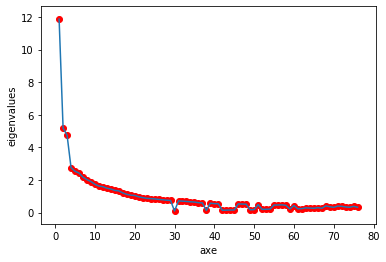

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(pdv6['axe'],pdv6['eigenvalues'])
plt.scatter(pdv6['axe'],pdv6['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')

In [ ]:
v_1,v_2=egvalues6[0:2]
u_1,u_2=egvectors6[0:2]

In [ ]:
c_1=np.matmul(data_mfeatfou_scaled.values,u_1)
c_2=np.matmul(data_mfeatfou_scaled.values,u_2)

In [ ]:
# nouveau dataframe from pca
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)

# data_mfeatZer_pca=pd.DataFrame(list(c_1),list(c_2),list(c_3))
# # # data_mfeatZer_pca['F1','F2','F3']=[c_1,c_2,c_3]
data_mfeatfou_pca=pd.DataFrame([pdseries1,pdseries2])
data_mfeatfou_pca=data_mfeatfou_pca.T
data_mfeatfou_pca.columns=['F1','F2']
data_mfeatfou_pca

,F1,F2
0,-1.531635,0.507105
1,-0.914598,-0.053045
2,-0.955214,1.091768
3,-1.008358,-0.751215
4,-0.337723,1.653939
...,...,...
1994,-0.836342,0.536316
1995,0.431036,0.066054
1996,0.289249,-0.181797
1997,-0.553647,0.684266


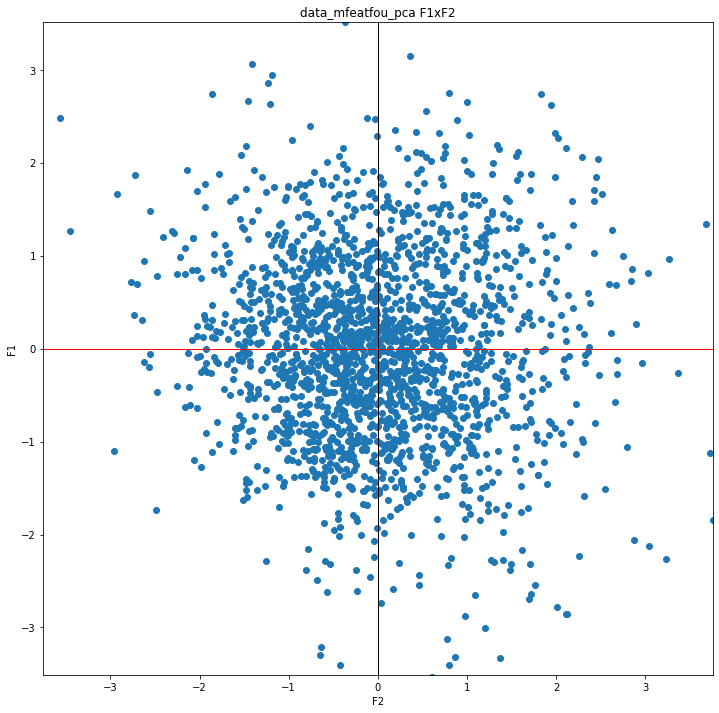

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_mfeatfou_pca['F1'].max(),data_mfeatfou_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_mfeatfou_pca['F2'].max(),data_mfeatfou_pca['F2'].max()) #et en ordonnée

#placement des étiquettes des observations
#data_mfeatZer_pca[i,1]
# for i in range(data_mfeatZer_pca.shape[0]):
#         plt.annotate(data_mfeatZer_pca.index[i],(data_mfeatZer_pca[i,0],data_mfeatZer_pca[i,1]))
plt.scatter(x=data_mfeatfou_pca['F1'],y=data_mfeatfou_pca['F2']) 
plt.xlabel('F2')
plt.ylabel('F1')
plt.title('data_mfeatfou_pca F1xF2')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

# CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data_mfeatfou_pca)
y_kmeans=kmeans.predict(data_mfeatfou_pca)
data_mfeatfou_pca['classe']=y_kmeans

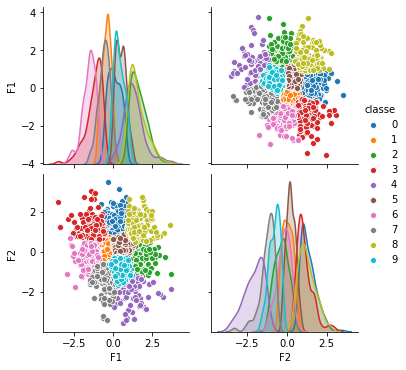

In [ ]:
import seaborn as sns
sns.pairplot(data=data_mfeatfou_pca, hue='classe')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Interprétations

In [ ]:
data_mfeatfou_pca['classe'].value_counts()

1    367
9    264
5    255
7    238
0    196
3    186
6    163
2    133
8    124
4     73
Name: classe, dtype: int64

## PCA regroupé des six dataset

In [ ]:
data_mfeatFou=pd.read_fwf('mfeat-fou', sep='\s+', header=None,names=['z'+str(i) for i in range(76)])
data_mfeaKar=pd.read_fwf('mfeat-kar', sep='\s+', header=None,names=['t'+str(i) for i in range(64)])
data_mfeatMor=pd.read_fwf('mfeat-mor', sep='\s+', header=None,names=['u'+str(i) for i in range(6)])
data_mfeatPix=pd.read_fwf('mfeat-pix', sep='\s+', header=None,names=['v'+str(i) for i in range(240)])

In [ ]:
data=pd.concat([data_mfeatZer,data_mfeatFac,data_mfeaKar,data_mfeatFou,data_mfeatMor,data_mfeatPix],axis=1)
# data représente l'ensemble des six  dataframes 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,2000.0,0.078554,0.066552,0.001094,0.032160,0.057027,0.106162,0.496841
x1,2000.0,1.764332,1.159269,0.032385,0.928543,1.550141,2.360365,9.363772
x2,2000.0,21.708127,11.728827,0.364935,12.391974,20.868980,29.715504,72.443632
x3,2000.0,69.881897,38.348810,2.240865,40.587107,63.220758,94.255601,200.558005
x4,2000.0,109.519676,53.202068,3.822781,69.938353,106.643071,143.995104,284.648888
...,...,...,...,...,...,...,...,...
v235,2000.0,2.513000,1.764479,0.000000,0.000000,4.000000,4.000000,4.000000
v236,2000.0,2.085500,1.825611,0.000000,0.000000,2.000000,4.000000,4.000000
v237,2000.0,1.511500,1.792896,0.000000,0.000000,0.000000,4.000000,4.000000
v238,2000.0,0.918000,1.547732,0.000000,0.000000,0.000000,1.000000,4.000000


In [ ]:
mean_data=data.mean()
std_data=data.std()
data_scaled=(data-mean_data)/std_data
data_scaled

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239
0,-1.014568,-0.804702,-0.541940,0.154494,1.166017,1.804693,0.586046,0.055656,-0.000248,-0.759656,...,0.760559,0.675036,0.648329,0.660726,0.741598,0.276002,-1.142357,-0.843050,-0.593126,-0.368213
1,-0.605294,-0.515486,-0.953310,-0.717431,-0.457361,1.242694,1.055715,-0.965414,-1.396703,-0.746418,...,-0.369963,0.675036,0.648329,0.660726,0.741598,-0.290737,-1.142357,-0.843050,-0.593126,-0.368213
2,-0.538764,-0.465228,-1.145411,-0.994480,-1.035138,1.111790,2.414428,-0.872206,-1.051339,-0.750584,...,-0.935224,0.087537,0.648329,0.660726,0.741598,0.842741,1.048690,0.272464,0.052981,-0.368213
3,-0.693233,-0.108762,-0.213392,-0.487244,-0.983757,1.312678,1.081663,-0.504180,-0.397113,-0.667718,...,0.760559,0.675036,0.648329,0.660726,-0.454045,-1.424216,-1.142357,-0.843050,-0.593126,-0.368213
4,-0.941937,-0.994395,-1.115226,-0.848966,-1.146772,1.561144,0.906341,-0.817467,-0.937723,-0.844406,...,0.760559,0.675036,0.648329,0.660726,0.143776,-0.857477,-1.142357,-0.843050,-0.593126,-0.368213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.899422,-1.469741,-1.493610,-1.298849,0.513968,0.791822,-0.637891,-1.033889,-1.532430,-1.037910,...,0.760559,0.675036,0.648329,0.660726,0.741598,0.842741,1.048690,-0.843050,-0.593126,-0.368213
1996,-0.795666,-1.200022,-1.151729,-0.876845,-0.862151,-0.393282,-0.404159,-0.739630,-1.010533,-0.727318,...,0.760559,0.675036,0.648329,0.053720,-1.649689,-1.424216,-1.142357,-0.843050,-0.593126,-0.368213
1997,-0.816808,-0.844587,-1.010816,-0.576540,-0.717672,0.926190,-0.703268,-0.758643,-0.468151,-0.186333,...,-1.500485,-0.499962,0.648329,0.660726,0.741598,-0.857477,-1.142357,-0.843050,-0.593126,-0.368213
1998,-1.029400,-1.316490,-1.741236,-1.530443,-0.523669,1.198398,-1.090010,-0.951538,-0.877831,-0.456865,...,0.195298,0.675036,0.648329,0.660726,0.741598,-0.290737,-1.142357,-0.843050,-0.593126,-0.368213


In [ ]:
cormat=data_scaled.corr()
cormat

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,v230,v231,v232,v233,v234,v235,v236,v237,v238,v239
x0,1.000000,0.582228,0.586857,0.426893,0.172336,-0.359551,0.184742,0.654838,0.445003,0.468497,...,-0.183673,-0.193503,-0.208217,-0.229185,-0.238856,-0.209137,-0.075128,0.047402,0.172605,0.272532
x1,0.582228,1.000000,0.626514,0.333225,0.204875,-0.242210,0.130647,0.315138,0.202820,0.092235,...,-0.127845,-0.197288,-0.246147,-0.250654,-0.188299,-0.055225,0.100584,0.195391,0.269849,0.344904
x2,0.586857,0.626514,1.000000,0.707603,0.296111,-0.142328,0.228529,0.458392,0.216117,0.067381,...,-0.027145,-0.168492,-0.239868,-0.231525,-0.135912,0.011768,0.161011,0.232462,0.238955,0.231013
x3,0.426893,0.333225,0.707603,1.000000,0.395266,-0.100937,0.162384,0.363167,0.074018,-0.030265,...,-0.209929,-0.368220,-0.420981,-0.357800,-0.204190,0.031682,0.177829,0.228330,0.207805,0.178981
x4,0.172336,0.204875,0.296111,0.395266,1.000000,-0.034110,0.144303,0.123658,0.077429,0.025639,...,-0.071645,-0.132972,-0.184230,-0.199334,-0.145152,-0.003887,0.057837,0.083516,0.072059,0.073194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v235,-0.209137,-0.055225,0.011768,0.031682,-0.003887,0.127526,-0.027791,-0.097260,-0.126980,-0.228650,...,-0.142232,-0.081637,0.111504,0.402320,0.750626,1.000000,0.816749,0.550800,0.335974,0.161246
v236,-0.075128,0.100584,0.161011,0.177829,0.057837,-0.039994,0.021066,0.033482,0.000343,-0.142441,...,-0.253080,-0.236088,-0.105931,0.136081,0.457061,0.816749,1.000000,0.830895,0.579472,0.347185
v237,0.047402,0.195391,0.232462,0.228330,0.083516,-0.164742,0.058223,0.113411,0.110398,-0.068891,...,-0.289815,-0.294171,-0.225042,-0.059865,0.214180,0.550800,0.830895,1.000000,0.805450,0.505758
v238,0.172605,0.269849,0.238955,0.207805,0.072059,-0.254975,0.108588,0.181110,0.217882,0.018047,...,-0.302856,-0.323273,-0.283816,-0.182757,0.033343,0.335974,0.579472,0.805450,1.000000,0.726799


In [ ]:
from numpy import linalg as LA 
egvalues,egvectors = LA.eig(cormat)
print('eigenvalues\n\n',egvalues)
print('-'*90)
print('eigenvectors\n\n',egvectors)

eigenvalues

 [ 9.06241484e+01+0.00000000e+00j  6.17285829e+01+0.00000000e+00j
  4.97018099e+01+0.00000000e+00j  3.45422626e+01+0.00000000e+00j
  3.02975834e+01+0.00000000e+00j  2.41392843e+01+0.00000000e+00j
  2.10724761e+01+0.00000000e+00j  1.69665814e+01+0.00000000e+00j
  1.52778433e+01+0.00000000e+00j  1.42362494e+01+0.00000000e+00j
  1.12638775e+01+0.00000000e+00j  1.02162530e+01+0.00000000e+00j
  9.04916910e+00+0.00000000e+00j  7.92509311e+00+0.00000000e+00j
  7.77071625e+00+0.00000000e+00j  7.45329158e+00+0.00000000e+00j
  6.54086734e+00+0.00000000e+00j  6.20828238e+00+0.00000000e+00j
  5.54325361e+00+0.00000000e+00j  4.96569725e+00+0.00000000e+00j
  4.82710530e+00+0.00000000e+00j  4.43186154e+00+0.00000000e+00j
  4.41576782e+00+0.00000000e+00j  4.04682542e+00+0.00000000e+00j
  3.78177999e+00+0.00000000e+00j  3.56815222e+00+0.00000000e+00j
  3.47311109e+00+0.00000000e+00j  3.36555293e+00+0.00000000e+00j
  3.23849053e+00+0.00000000e+00j  3.07124564e+00+0.00000000e+00j
  3.0346642

In [ ]:
def eigenvalues_de_Kaiser(egvalues,egvectors):
    liste=[]
    liste1=[]
    for i in range(len(egvalues)):
        if egvalues[i]>1:
            liste.append(egvalues[i])
            liste1.append(egvectors[i])
    return liste,liste1
egvalues,egvectors=eigenvalues_de_Kaiser(egvalues,egvectors)
len(egvalues)

83

In [ ]:
pdv=pd.DataFrame({'axe': np.arange(83)+1,'eigenvalues':list(egvalues)})

pdv
pdv['proportion']=pdv['eigenvalues']/pdv['eigenvalues'].sum()*100
pdv['cumul']=pdv['proportion'].cumsum()
pdv

,axe,eigenvalues,proportion,cumul
0,1,90.624148+0.000000j,16.144017+0.000000j,16.144017+0.000000j
1,2,61.728583+0.000000j,10.996487+0.000000j,27.140504+0.000000j
2,3,49.701810+0.000000j,8.854007+0.000000j,35.994511+0.000000j
3,4,34.542263+0.000000j,6.153447+0.000000j,42.147958+0.000000j
4,5,30.297583+0.000000j,5.397289+0.000000j,47.545247+0.000000j
...,...,...,...,...
78,79,1.030562+0.000000j,0.183587+0.000000j,99.279789+0.000000j
79,80,1.024364+0.000000j,0.182483+0.000000j,99.462271+0.000000j
80,81,1.016735+0.000000j,0.181124+0.000000j,99.643395+0.000000j
81,82,1.001141+0.000000j,0.178346+0.000000j,99.821741+0.000000j


/home/ams/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ams/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'eigenvalues')

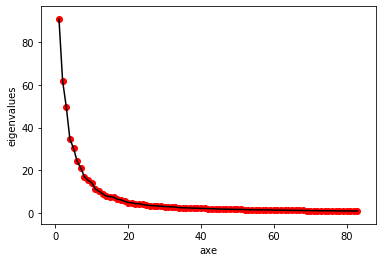

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(pdv['axe'],pdv['eigenvalues'],c='black')
plt.scatter(pdv['axe'],pdv['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')
# plt.bar(pdv['axe'],pdv['eigenvalues'])

In [ ]:
v_1,v_2,v_3,v_4=egvalues[0:4]
u_1,u_2,u_3,u_4=egvectors[0:4]
c_1=np.matmul(data_scaled.values,u_1) # la premiere composante
c_2=np.matmul(data_scaled.values,u_2)   # la deuxieme composante
c_3=np.matmul(data_scaled.values,u_3)# la troisieme composante 
c_4=np.matmul(data_scaled.values,u_4)
c_1=c_1.astype(float)
c_2=c_2.astype(float)
c_3=c_3.astype(float)
c_4=c_4.astype(float)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/home/ams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/home/ams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/ams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
/home/ams/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# nouveau dataframe from pca
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
pdseries3=pd.Series(c_3)
pdseries4=pd.Series(c_4)
data_pca=pd.DataFrame([pdseries1,pdseries2,pdseries3,pdseries4])
data_pca=data_pca.T
data_pca.columns=['F1','F2','F3','F4']
data_pca

,F1,F2,F3,F4
0,-0.174879,0.651943,-1.598597,-0.671089
1,-0.632794,0.313703,-1.385435,-0.064714
2,-0.250803,0.141086,-1.119940,0.788781
3,-0.077923,-0.640687,-0.444289,0.573361
4,-0.083946,0.362932,-0.609968,0.891216
...,...,...,...,...
1995,-0.089197,0.667696,0.506990,0.924429
1996,1.106255,-0.293710,-1.339943,-0.056251
1997,0.384506,-0.374927,0.457654,-0.094601
1998,1.103075,-0.338603,1.076459,0.730042


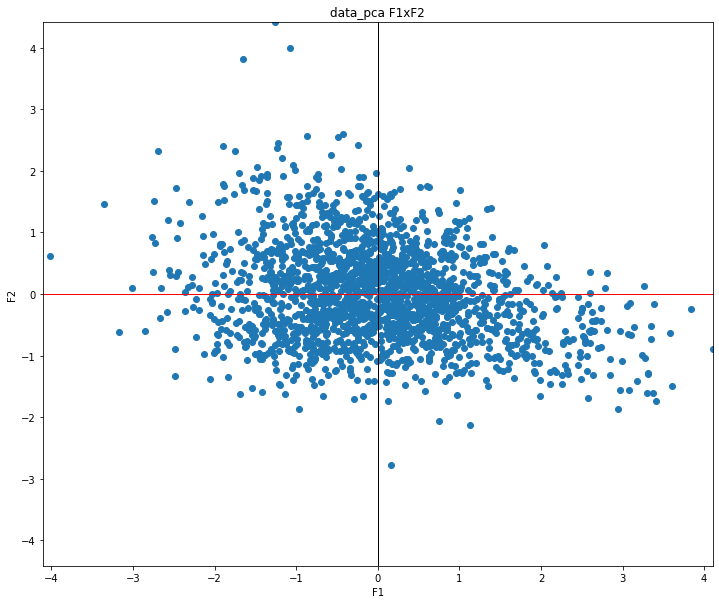

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_pca['F1'].max(),data_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F2'].max(),data_pca['F2'].max()) #et en ordonnée

plt.scatter(x=data_pca['F1'],y=data_pca['F2']) 
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('data_pca F1xF2')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

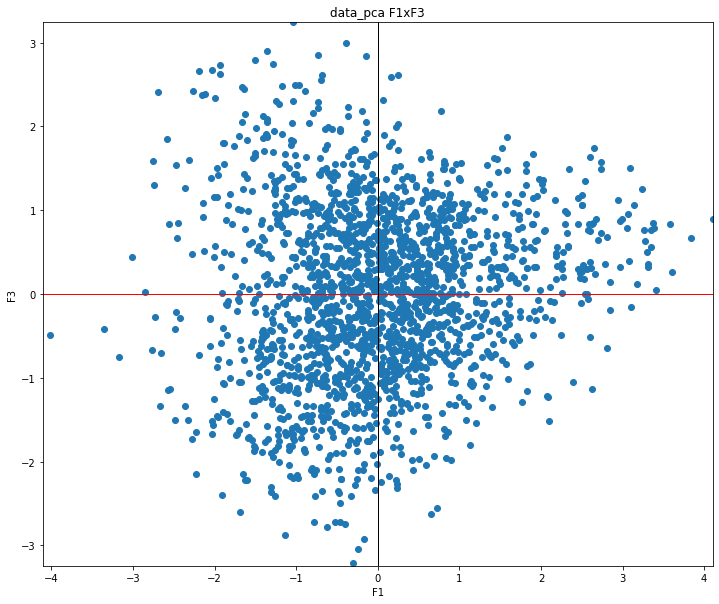

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_pca['F1'].max(),data_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F3'].max(),data_pca['F3'].max()) #et en ordonnée

plt.scatter(x=data_pca['F1'],y=data_pca['F3']) 
plt.xlabel('F1')
plt.ylabel('F3')
plt.title('data_pca F1xF3')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

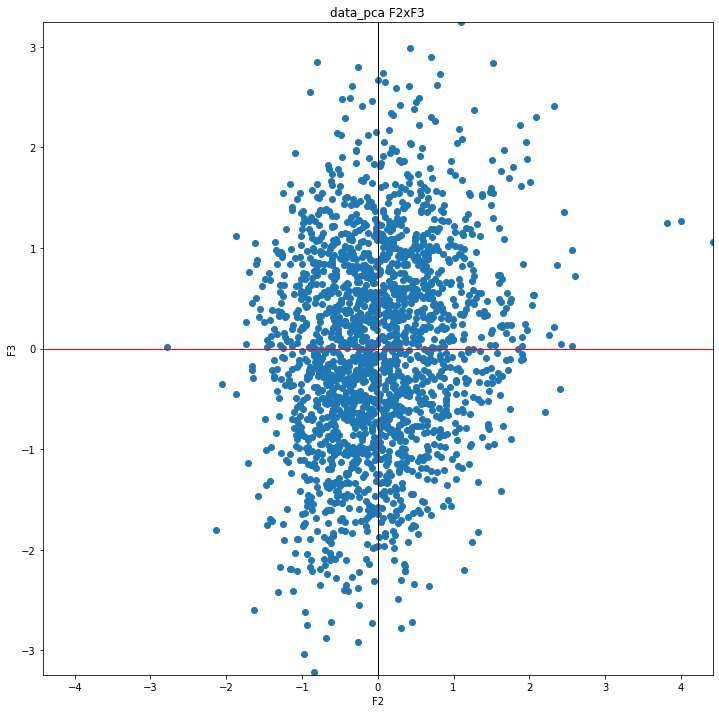

In [ ]:

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-data_pca['F2'].max(),data_pca['F2'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F3'].max(),data_pca['F3'].max()) #et en ordonnée

plt.scatter(x=data_pca['F2'],y=data_pca['F3']) 
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('data_pca F2xF3')
 #ajouter les axes  
plt.plot([-data_pca['F2'].max(),data_pca['F2'].max()],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-data_pca['F3'].max(),data_pca['F3'].max()],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

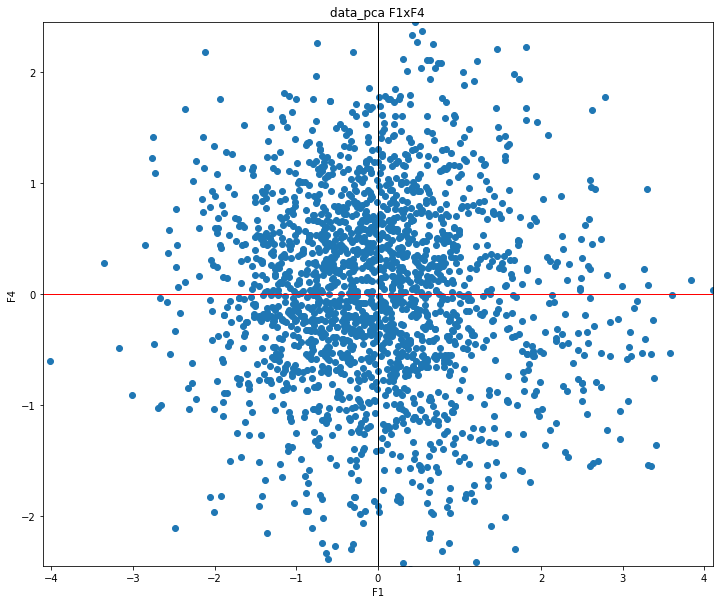

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_pca['F1'].max(),data_pca['F1'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F4'].max(),data_pca['F4'].max()) #et en ordonnée

plt.scatter(x=data_pca['F1'],y=data_pca['F4']) 
plt.xlabel('F1')
plt.ylabel('F4')
plt.title('data_pca F1xF4')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

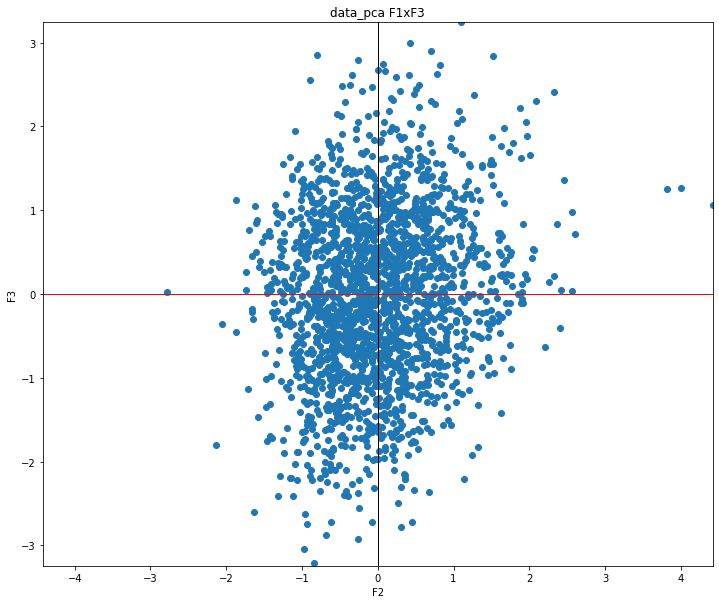

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_pca['F2'].max(),data_pca['F2'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F3'].max(),data_pca['F3'].max()) #et en ordonnée

plt.scatter(x=data_pca['F2'],y=data_pca['F3']) 
plt.xlabel('F2')
plt.ylabel('F3')
plt.title('data_pca F1xF3')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

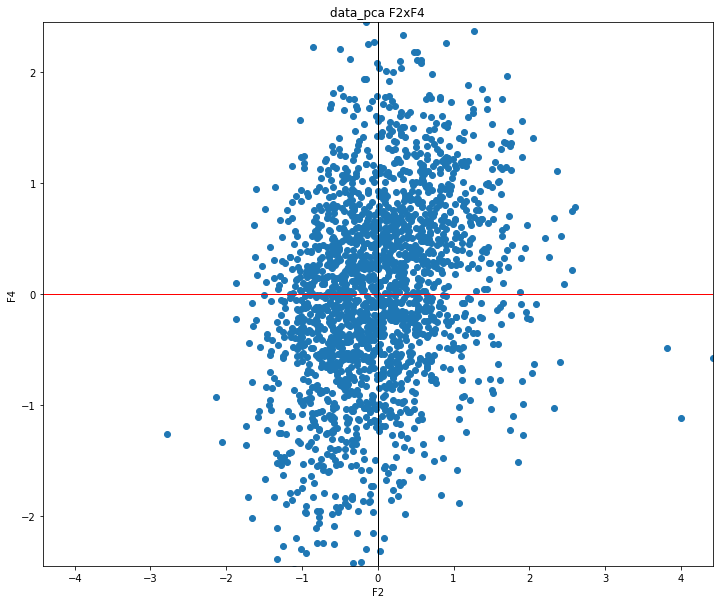

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_pca['F2'].max(),data_pca['F2'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F4'].max(),data_pca['F4'].max()) #et en ordonnée

plt.scatter(x=data_pca['F2'],y=data_pca['F4']) 
plt.xlabel('F2')
plt.ylabel('F4')
plt.title('data_pca F2xF4')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

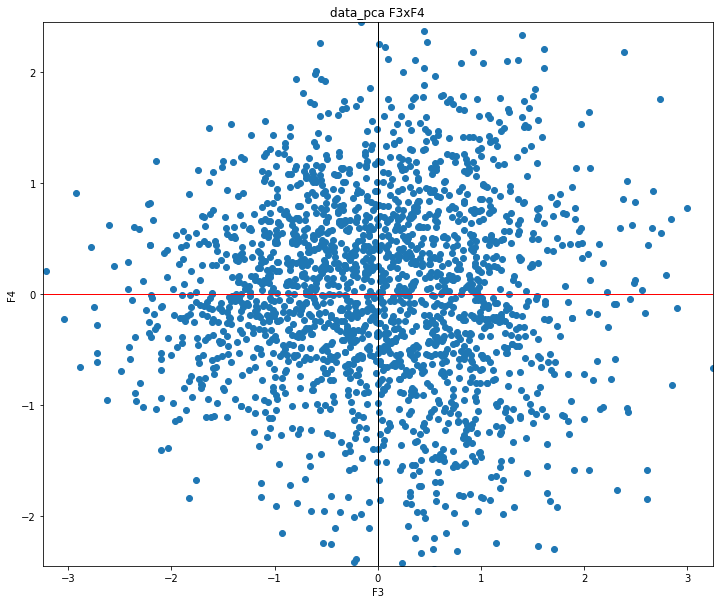

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
axes.set_xlim(-data_pca['F3'].max(),data_pca['F3'].max()) #même limites en abscisse
axes.set_ylim(-data_pca['F4'].max(),data_pca['F4'].max()) #et en ordonnée

plt.scatter(x=data_pca['F3'],y=data_pca['F4']) 
plt.xlabel('F3')
plt.ylabel('F4')
plt.title('data_pca F3xF4')
 #ajouter les axes  
plt.plot([-7,7],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-7,7],color='black',linestyle='-',linewidth=1) #affichage plt.show()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10)
kmeans.fit(data_pca)
y_kmeans=kmeans.predict(data_pca)
data_pca['classe']=y_kmeans

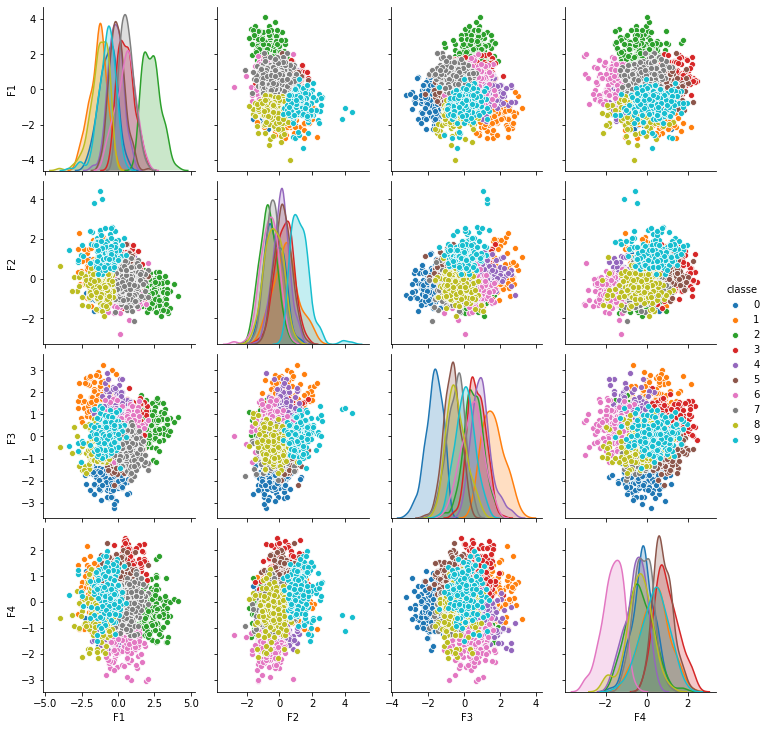

In [ ]:
sns.pairplot(data=data_pca, hue='classe')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data_pca['classe'].value_counts()

In [ ]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(data)
y_kmeans=kmeans.predict(data)
data['classe']=y_kmeans

# Commentaire

1. mfeat-fou: 76 Fourier coefficients of the character shapes; 
2. mfeat-fac: 216 profile correlations; 
3. mfeat-kar: 64 Karhunen-Loève coefficients; 
4. mfeat-pix: 240 pixel averages in 2 x 3 windows; 
5. mfeat-zer: 47 Zernike moments; 
6. mfeat-mor: 6 morphological features. 
7. L'ensemble du dataset  619 features

En travaillant avec chaque tableau de données on constate qu'on a 3 axes factoriels pour certains et deux seulement pour les données morphological (mfeat-mor) et avec 3 axes il n' est pas possible de voir le nuage de points dans le plan. De meme si on fait le PCA du dataset global on retient 4 axis factoriels et avec 4 axes factoriels il est aussi impossible de voir le nuage de points dans le plan. Donc les données morphological (mfeat-mor) constituent celles qui donnent une vizualisation des nuages de points à deux dimensions.

<html>
    <table width='800' >
 <th width="50">S/N</th>               
<th>Data</th>
<th >Number of Factorial Axis</th>
<th >Proportions</th>
<tr>
    <td>1</td>
    <td>data_fmeat_fac</td>
      <td>3 </td>
   <td> 43.63%</td>
</tr>
<tr>
    <td>2</td>
    <td>data_fmeat_kar</td>
      <td>3 </td>
   <td> 22.60%</td>
</tr>
<tr>
    <td>3</td>
    <td>data_fmeat_mor</td>
      <td>2</td>
   <td> 76.20%</td>
</tr>
<tr><td>4</td>
    <td>data_fmeat_pix</td>
      <td>3</td>
   <td> 34.66%</td>
</tr>
<tr><td>5</td>
    <td>data_fmeat_fou</td>
      <td>3</td>
   <td> 22.44%</td>
    
</tr>
<tr>
    <td>6</td>
    <td>data_fmeat_zer</td>
      <td>3</td>
   <td> 48.24%</td>
</tr>
    <tr >
    <td>7</td>
       <td>L'ensemble du dataset</td>
      <td>4</td>
   <td bgcolor='red'>42.14%</td>
</tr>

  </table>
</html>
    
    

In [ ]:
data_scaled

In [ ]:
x_pix=data_mfeatpix_pca['classe'].value_counts()
x_pix=pd.DataFrame(x_pix)
x_pix.sort_index(inplace=True)


x_zer=data_mfeatZer_pca['classe'].value_counts()
x_zer=pd.DataFrame(x_zer)
x_zer.sort_index(inplace=True)

x_fac=data_mfeatFac_pca['classe'].value_counts()
x_fac=pd.DataFrame(x_fac)
x_fac.sort_index(inplace=True)

x_mor=data_mfeatMor_pca['classe'].value_counts()
x_mor=pd.DataFrame(x_mor)
x_mor.sort_index(inplace=True)

x_fou=data_mfeatfou_pca['classe'].value_counts()
x_fou=pd.DataFrame(x_fou)
x_fou.sort_index(inplace=True)

x_kar=data_mfeaKar_pca['classe'].value_counts()
x_kar=pd.DataFrame(x_kar)
x_kar.sort_index(inplace=True)

x_data=data_pca['classe'].value_counts()
x_data=pd.DataFrame(x_data)
x_data.sort_index(inplace=True)


## Synthese sur le resultats de classification de Kmeans sur tous les six jeux de données

In [ ]:
Resultat=pd.concat([x_pix,x_zer,x_fac,x_mor,x_fou,x_kar,x_data],axis=1)
Resultat.columns=['class_mfeatpix','class_mfeatzer','class_mfeatfac','class_mfeatmor','class_mfeatfou','class_mfeatkar','class_data_general']
Resultat

In [ ]:
Resultat-200 # connaissant que chaque chiffre a une occurence de 200 dans le jeu de données initiales.

### Interprétations de Kmeans

Apres avoir effectué Kmeans sur tous nos groupes et sur notre jeu de donnée initiales, on remarque que parmi ces groupes, c'est mfeatmor qui classifie bien chaque chiffre. Et le jeu de données initiale, classifie plus que tous ces groupes.